# ----------------------------------------IPL  data analysis----------------------------------------

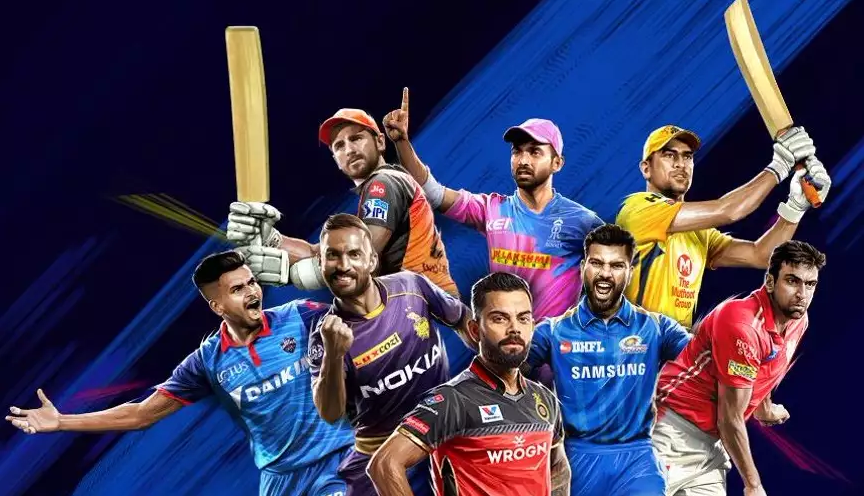


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import itertools
import plotly.express as px
import ppscore as pps
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 6, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"




In [2]:
data=pd.read_csv('Deliveries 2008-2019.csv')#loading players deliveries dataset
data.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
matches=pd.read_csv('matches 2008-2019.csv')#loading match details dataset
matches.head()

ID  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
## Data Cleaning

In [5]:
matches['team1'].unique(),len(matches['team1'].unique())# finding unique name of teams and total number

(array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
        'Rising Pune Supergiant', 'Royal Challengers Bangalore',
        'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
        'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
        'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
        'Delhi Capitals'], dtype=object),
 15)

In [6]:
# Changing the names of the teams
# Some teams changed their names too, so changing their names
matches.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace=True)
matches.replace('Pune Warriors', 'Rising Pune Supergiants', inplace=True)
matches.replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
matches.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)

data.replace("Rising Pune Supergiant","Rising Pune Supergiants", inplace=True)
data.replace('Pune Warriors', 'Rising Pune Supergiants', inplace=True)
data.replace('Deccan Chargers', 'Sunrisers Hyderabad', inplace=True)
data.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)

In [7]:
matches['city'].unique(),len(matches['city'].unique())# finding unique name of cities and total number

(array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
        'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
        'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
        'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
        'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
        'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
        'Mohali', 'Bengaluru'], dtype=object),
 33)

In [8]:
matches['venue'].unique(), len(matches['venue'].unique())# finding unique name of stadium and total number

(array(['Rajiv Gandhi International Stadium, Uppal',
        'Maharashtra Cricket Association Stadium',
        'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
        'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
        'Feroz Shah Kotla',
        'Punjab Cricket Association IS Bindra Stadium, Mohali',
        'Green Park', 'Punjab Cricket Association Stadium, Mohali',
        'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
        'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
        'Kingsmead', 'SuperSport Park', 'Buffalo Park',
        'New Wanderers Stadium', 'De Beers Diamond Oval',
        'OUTsurance Oval', 'Brabourne Stadium',
        'Sardar Patel Stadium, Motera', 'Barabati Stadium',
        'Vidarbha Cricket Association Stadium, Jamtha',
        'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
        'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
        'Subrata Roy Sahara Stadium',


In [9]:
matches.isnull().sum()# finding null values

ID                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [11]:
matches['city'].unique(),len(matches['city'].unique())# finding unique name of cities and total number

(array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Mumbai', 'Kolkata',
        'Bengaluru', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
        'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
        'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
        'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
        'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
        'Dubai', 'Mohali'], dtype=object),
 32)

In [12]:
matches.isnull().sum()

ID                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [13]:
data.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [14]:
matches['winner'].unique(),len(matches['winner'].unique())# finding unique name of winners and total number

(array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
        'Kolkata Knight Riders', 'Kings XI Punjab', 'Mumbai Indians',
        'Delhi Capitals', 'Gujarat Lions', 'Royal Challengers Bangalore',
        'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
       dtype=object),
 11)

In [15]:
len(data['batsman'].unique())# total number of batsmen

516

In [16]:
len(data['bowler'].unique())# total number of bowlers

405

In [17]:
data.describe()

match_id         inning           over           ball  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean     1802.252957       1.482952      10.162488       3.615587   
std      3472.322805       0.502074       5.677684       1.806966   
min         1.000000       1.000000       1.000000       1.000000   
25%       190.000000       1.000000       5.000000       2.000000   
50%       379.000000       1.000000      10.000000       4.000000   
75%       567.000000       2.000000      15.000000       5.000000   
max     11415.000000       5.000000      20.000000       9.000000   

       is_super_over      wide_runs       bye_runs    legbye_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.000452       0.036721       0.004936       0.021136   
std         0.021263       0.251161       0.116480       0.194908   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       5.000000       4.000000       5.000000   

         noball_runs   penalty_runs   batsman_runs     extra_runs  \
count  179078.000000  179078.000000  179078.000000  179078.000000   
mean        0.004183       0.000056       1.246864       0.067032   
std         0.070492       0.016709       1.608270       0.342553   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       1.000000       0.000000   
max         5.000000       5.000000       7.000000       7.000000   

          total_runs  
count  179078.000000  
mean        1.313897  
std         1.605422  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max        10.000000

In [18]:
matches.describe()

ID       season  dl_applied  win_by_runs  win_by_wickets
count    750.000000   750.000000  750.000000   750.000000      750.000000
mean    1774.281333  2013.424000    0.025333    13.369333        3.374667
std     3441.199080     3.363427    0.157240    23.539720        3.390027
min        1.000000  2008.000000    0.000000     0.000000        0.000000
25%      189.250000  2011.000000    0.000000     0.000000        0.000000
50%      377.500000  2013.000000    0.000000     0.000000        4.000000
75%      565.750000  2016.000000    0.000000    19.000000        6.000000
max    11415.000000  2019.000000    1.000000   146.000000       10.000000

## Analysis on the base of Year

In [19]:
year=2008 # selecting specific year

In [20]:
filt1=(matches['season']==year) #creating a new dataframe for that year
df_season=matches[filt1]
df_season

ID  season        city        date                        team1  \
59    60    2008   Bengaluru  2008-04-18        Kolkata Knight Riders   
60    61    2008  Chandigarh  2008-04-19          Chennai Super Kings   
61    62    2008       Delhi  2008-04-19             Rajasthan Royals   
62    63    2008      Mumbai  2008-04-20               Mumbai Indians   
63    64    2008     Kolkata  2008-04-20          Sunrisers Hyderabad   
64    65    2008      Jaipur  2008-04-21              Kings XI Punjab   
65    66    2008   Hyderabad  2008-04-22          Sunrisers Hyderabad   
66    67    2008     Chennai  2008-04-23          Chennai Super Kings   
67    68    2008   Hyderabad  2008-04-24          Sunrisers Hyderabad   
68    69    2008  Chandigarh  2008-04-25              Kings XI Punjab   
69    70    2008   Bengaluru  2008-04-26  Royal Challengers Bangalore   
70    71    2008     Chennai  2008-04-26        Kolkata Knight Riders   
71    72    2008      Mumbai  2008-04-27               Mumbai Indians   
72    73    2008  Chandigarh  2008-04-27               Delhi Capitals   
73    74    2008   Bengaluru  2008-04-28          Chennai Super Kings   
74    75    2008     Kolkata  2008-04-29        Kolkata Knight Riders   
75    76    2008       Delhi  2008-04-30               Delhi Capitals   
76    77    2008   Hyderabad  2008-05-01          Sunrisers Hyderabad   
77    78    2008      Jaipur  2008-05-01             Rajasthan Royals   
78    79    2008     Chennai  2008-05-02          Chennai Super Kings   
79    80    2008   Hyderabad  2008-05-25          Sunrisers Hyderabad   
80    81    2008  Chandigarh  2008-05-03              Kings XI Punjab   
81    82    2008      Mumbai  2008-05-04               Mumbai Indians   
82    83    2008      Jaipur  2008-05-04          Chennai Super Kings   
83    84    2008   Bengaluru  2008-05-05  Royal Challengers Bangalore   
84    85    2008     Chennai  2008-05-06          Chennai Super Kings   
85    86    2008      Mumbai  2008-05-07             Rajasthan Royals   
86    87    2008       Delhi  2008-05-08               Delhi Capitals   
87    88    2008     Kolkata  2008-05-08        Kolkata Knight Riders   
88    89    2008      Jaipur  2008-05-09          Sunrisers Hyderabad   
89    90    2008   Bengaluru  2008-05-28  Royal Challengers Bangalore   
90    91    2008     Chennai  2008-05-10          Chennai Super Kings   
91    92    2008   Hyderabad  2008-05-11        Kolkata Knight Riders   
92    93    2008      Jaipur  2008-05-11               Delhi Capitals   
93    94    2008  Chandigarh  2008-05-12  Royal Challengers Bangalore   
94    95    2008     Kolkata  2008-05-13        Kolkata Knight Riders   
95    96    2008      Mumbai  2008-05-14          Chennai Super Kings   
96    97    2008  Chandigarh  2008-05-28              Kings XI Punjab   
97    98    2008       Delhi  2008-05-15               Delhi Capitals   
98    99    2008      Mumbai  2008-05-16        Kolkata Knight Riders   
99   100    2008       Delhi  2008-05-17               Delhi Capitals   
100  101    2008      Jaipur  2008-05-17             Rajasthan Royals   
101  102    2008   Hyderabad  2008-05-18               Mumbai Indians   
102  103    2008     Kolkata  2008-05-18        Kolkata Knight Riders   
103  104    2008   Bengaluru  2008-05-19  Royal Challengers Bangalore   
104  105    2008     Kolkata  2008-05-20        Kolkata Knight Riders   
105  106    2008      Mumbai  2008-05-21              Kings XI Punjab   
106  107    2008     Chennai  2008-05-21  Royal Challengers Bangalore   
107  108    2008  Chandigarh  2008-05-23          Sunrisers Hyderabad   
108  109    2008       Delhi  2008-05-24               Mumbai Indians   
109  110    2008     Chennai  2008-05-24             Rajasthan Royals   
110  111    2008   Bengaluru  2008-05-03  Royal Challengers Bangalore   
111  112    2008     Kolkata  2008-05-25              Kings XI Punjab   
112  113    2008      Jaipur  2008-05-26               Mumbai In

### 1) Number of matches played 

In [21]:
df_season1 = df_season[['season','ID']].copy()
df=df_season1['season'].value_counts().reset_index()
df.columns=['season', 'total matches']
df

season  total matches
0    2008             58

### 2) Team wise field and bat decision

In [22]:
df = df_season[['toss_winner', 'toss_decision']].copy()
df['count'] = df.groupby(['toss_winner', 'toss_decision'])['toss_decision'].transform('count')
df = df.drop_duplicates().sort_values('count',ascending=False).reset_index(drop=True)
df.head()

toss_winner toss_decision  count
0       Rajasthan Royals         field      8
1         Mumbai Indians         field      7
2  Kolkata Knight Riders           bat      6
3    Sunrisers Hyderabad         field      5
4    Chennai Super Kings           bat      4

In [23]:
fig = df.plot(kind='bar', x='toss_winner', y='count', color='toss_decision', barmode='group')
fig.update_layout(title='Toss wins and decisions')
fig.show()

### 3)Toss winner and match winner analysis

In [24]:
df = df_season[['toss_winner', 'winner']].copy() # creating a new datafrane with copy of 'toss_winner', 'winner' columns
df['count'] = df.groupby(['toss_winner', 'winner'])['winner'].transform('count')#creating a new column 'count' with count of
                                                                                #winner for tos winner
df = df.drop_duplicates().reset_index(drop=True).sort_values('count',ascending=False)
# dropping the duplicates, reseting the index and 
#arranging the count values from higher to lower
df.head()

toss_winner                 winner  count
8        Rajasthan Royals       Rajasthan Royals      9
20         Mumbai Indians         Mumbai Indians      4
15        Kings XI Punjab        Kings XI Punjab      4
21  Kolkata Knight Riders  Kolkata Knight Riders      3
1     Chennai Super Kings    Chennai Super Kings      3

In [25]:
fig = df.plot(kind='bar', x='toss_winner', y='count', color='winner')
fig.update_layout(title='Toss winner and match winner')
fig.show()

### 4) Players with most Player of the match titles and their teams

In [26]:
Tplayer = matches['player_of_match'].value_counts().reset_index()['index'].tolist()[:25]
#selecting the highest number of MOM player
df = df_season[['winner','player_of_match']].dropna() 
# creating a new datafrane with 'winner','player_of_match'columns and droping the NAN values
df['count'] = df.groupby(['winner','player_of_match'])['player_of_match'].transform('count')
#creating a new column 'count' with count of player_of_match
df = df.drop_duplicates().sort_values('count',ascending=False).reset_index(drop=True)
# dropping the duplicates, reseting the index and arranging the count values from higher to lower
df = df[df['player_of_match'].isin(Tplayer)]#selecting the top man of the match players
df.head()

winner player_of_match  count
0       Kings XI Punjab        SE Marsh      5
1      Rajasthan Royals       SR Watson      4
2      Rajasthan Royals       YK Pathan      4
7   Chennai Super Kings        MS Dhoni      2
10       Delhi Capitals        V Sehwag      2

In [27]:
fig = df.plot(kind='bar', x='player_of_match', y='count', color='winner')
fig.update_layout(title='Players with most Player of the match titles and their teams')
fig.show()

### 5) Matches won by team

In [28]:
win=pd.DataFrame(df_season['winner'].value_counts()).reset_index() #creating the dataframe with winner and total count
win.columns=['team_name','wins']# giving name to columns
win

team_name  wins
0             Rajasthan Royals    13
1              Kings XI Punjab    10
2          Chennai Super Kings     9
3               Mumbai Indians     7
4               Delhi Capitals     7
5        Kolkata Knight Riders     6
6  Royal Challengers Bangalore     4
7          Sunrisers Hyderabad     2

In [29]:
fig = win.plot(kind='bar', x='team_name', y='wins', color='wins')
fig.update_layout(title='Total Matches won by team')
fig.show()

### 6) Win by highest run

In [30]:
# creating a data frame with contains of 'venue','winner','win_by_runs' columns
df = df_season[['venue','winner','win_by_runs']].copy()
#grouping the cloumn by higest run winner count
df['win count'] = df.groupby(['venue','winner','win_by_runs'])['winner'].transform('count')
# droping the duplicates and arranging win_by_run in descending order
df = df.drop_duplicates().sort_values('win_by_runs',ascending=False).reset_index(drop=True)
df.head()

venue                 winner  \
0                       M Chinnaswamy Stadium  Kolkata Knight Riders   
1                            Wankhede Stadium       Rajasthan Royals   
2  Punjab Cricket Association Stadium, Mohali        Kings XI Punjab   
3                      Sawai Mansingh Stadium       Rajasthan Royals   
4                      Sawai Mansingh Stadium       Rajasthan Royals   

   win_by_runs  win count  
0          140          1  
1          105          1  
2           66          1  
3           65          1  
4           45          1

In [31]:
fig = df.plot(kind='bar', x='winner', y='win_by_runs', color='venue')
fig.update_layout(title='Win by highest run')
fig.show()

### 7) Number of times team won match in a venue

In [32]:
#creating a dataframe with detials of 'venue','winner'
df = df_season[['venue','winner']].copy()
#grouping the column by winner count
df['win count'] = df.groupby(['venue','winner'])['winner'].transform('count')
#removing the duplicate, arranging the values and reseting the index
df = df.drop_duplicates().sort_values('win count',ascending=False).reset_index(drop=True)
df.head()

venue                 winner  \
0                      Sawai Mansingh Stadium       Rajasthan Royals   
1  Punjab Cricket Association Stadium, Mohali        Kings XI Punjab   
2                            Feroz Shah Kotla         Delhi Capitals   
3                                Eden Gardens  Kolkata Knight Riders   
4             MA Chidambaram Stadium, Chepauk    Chennai Super Kings   

   win count  
0          7  
1          6  
2          4  
3          4  
4          3

In [33]:
fig = df.plot(kind='bar', x='winner', y='win count', color='venue')
fig.update_layout(title='Number of times team won match in a venue')
fig.show()

## Player details

### Indepth Analysis of MS Dhoni Performance

In [34]:
player_name=(data['batsman']=='MS Dhoni') 
df_Dhoni=data[player_name]#creating the dataframe with only specific player's details
df_Dhoni.head()

match_id  inning             batting_team    bowling_team  over  ball  \
469         2       2  Rising Pune Supergiants  Mumbai Indians    16     4   
473         2       2  Rising Pune Supergiants  Mumbai Indians    17     2   
478         2       2  Rising Pune Supergiants  Mumbai Indians    18     1   
479         2       2  Rising Pune Supergiants  Mumbai Indians    18     2   
482         2       2  Rising Pune Supergiants  Mumbai Indians    18     5   

      batsman non_striker          bowler  is_super_over  ...  bye_runs  \
469  MS Dhoni   SPD Smith       HH Pandya              0  ...         0   
473  MS Dhoni   SPD Smith       JJ Bumrah              0  ...         0   
478  MS Dhoni   SPD Smith  MJ McClenaghan              0  ...         0   
479  MS Dhoni   SPD Smith  MJ McClenaghan              0  ...         0   
482  MS Dhoni   SPD Smith  MJ McClenaghan              0  ...         0   

     legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
469            0            0             0             1           0   
473            0            0             0             1           0   
478            0            0             0             0           0   
479            0            0             0             1           0   
482            0            0             0             1           0   

     total_runs  player_dismissed dismissal_kind fielder  
469           1               NaN            NaN     NaN  
473           1               NaN            NaN     NaN  
478           0               NaN            NaN     NaN  
479           1               NaN            NaN     NaN  
482           1               NaN            NaN     NaN  

[5 rows x 21 columns]

In [35]:
#finding out Dhoni's dismissal count
df1=df_Dhoni['dismissal_kind'].value_counts()
df1

caught               71
run out              21
bowled               14
lbw                   5
caught and bowled     4
stumped               3
Name: dismissal_kind, dtype: int64

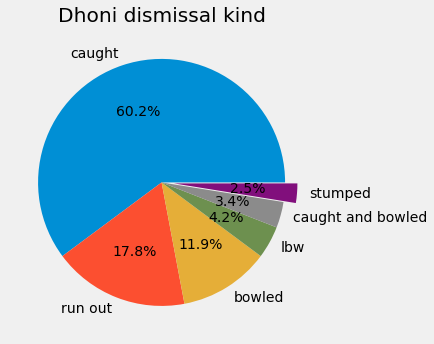

In [36]:
slices=[ 71,21,14,5,4,3]
labels=['caught','run out','bowled' ,'lbw','caught and bowled','stumped',]
explode=[0,0,0,0,0,0.1]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)
plt.title("Dhoni dismissal kind")
plt.tight_layout()
plt.show()

##### Runs contribution of MS Dhoni

In [37]:
#total ones by DA Dhoni
a=len(df_Dhoni[df_Dhoni['batsman_runs']==1])
print('total ones by DA Dhoni is',a)

#total twoss by DA Dhoni
b=len(df_Dhoni[df_Dhoni['batsman_runs']==2])
print('total twos by DA Dhoni is',b)

#total threes by DA Dhoni
c=len(df_Dhoni[df_Dhoni['batsman_runs']==3])
print('total threes by DA Dhoni is',c)

#total ones by DA Dhoni
d=len(df_Dhoni[df_Dhoni['batsman_runs']==4])
print('total fours by DA Dhoni is',d)

#total 6s by DA Dhoni
e=len(df_Dhoni[df_Dhoni['batsman_runs']==6])
print('total 6s by DA Dhoni is',e)


total ones by DA Dhoni is 1383
total twos by DA Dhoni is 304
total threes by DA Dhoni is 14
total fours by DA Dhoni is 297
total 6s by DA Dhoni is 207


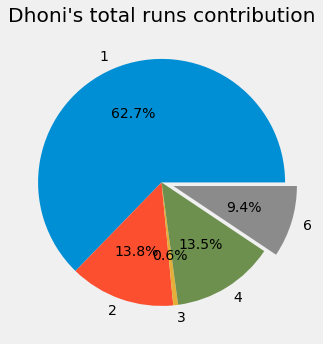

In [38]:
slices=[1383,304,14,297,207]
labels=[1,2,3,4,6]
explode=[0,0,0,0,0.1]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)
plt.title("Dhoni's total runs contribution")
plt.tight_layout()
plt.show()

### Indepth Analysis of V Kohli Performance

In [39]:
player_name=(data['batsman']=='V Kohli')
df_kohli=data[player_name]
df_kohli.head()

match_id  inning                 batting_team    bowling_team  over  \
2590        12       1  Royal Challengers Bangalore  Mumbai Indians     1   
2591        12       1  Royal Challengers Bangalore  Mumbai Indians     1   
2593        12       1  Royal Challengers Bangalore  Mumbai Indians     1   
2594        12       1  Royal Challengers Bangalore  Mumbai Indians     1   
2597        12       1  Royal Challengers Bangalore  Mumbai Indians     2   

      ball  batsman non_striker           bowler  is_super_over  ...  \
2590     2  V Kohli    CH Gayle       TG Southee              0  ...   
2591     3  V Kohli    CH Gayle       TG Southee              0  ...   
2593     5  V Kohli    CH Gayle       TG Southee              0  ...   
2594     6  V Kohli    CH Gayle       TG Southee              0  ...   
2597     1  V Kohli    CH Gayle  Harbhajan Singh              0  ...   

      bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
2590         0            0            0             0             0   
2591         0            0            0             0             1   
2593         0            0            0             0             0   
2594         0            0            0             0             1   
2597         0            0            0             0             0   

      extra_runs  total_runs  player_dismissed dismissal_kind fielder  
2590           1           1               NaN            NaN     NaN  
2591           0           1               NaN            NaN     NaN  
2593           0           0               NaN            NaN     NaN  
2594           0           1               NaN            NaN     NaN  
2597           0           0               NaN            NaN     NaN  

[5 rows x 21 columns]

In [40]:
#finding out kohli's dismissal count
df2=df_kohli['dismissal_kind'].value_counts()
df2

caught               95
bowled               30
run out              15
lbw                   7
stumped               3
caught and bowled     2
Name: dismissal_kind, dtype: int64

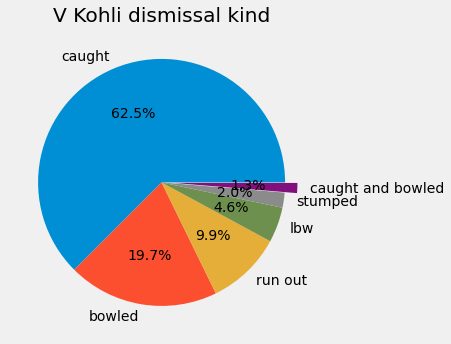

In [41]:
slices=[95,30,15,7,3,2]
labels=['caught','bowled' ,'run out','lbw','stumped','caught and bowled']
explode=[0,0,0,0,0,0.1]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)
plt.title("V Kohli dismissal kind")
plt.tight_layout()
plt.show()

##### Runs contribution of V Kohli

In [42]:
#total oness by V Kohli
a=len(df_kohli[df_kohli['batsman_runs']==1])
print('total ones by V Kohli is',a)

#total fours by V Kohli
b=len(df_kohli[df_kohli['batsman_runs']==2])
print('total twos by V Kohli is',b)

#total fours by V Kohli
c=len(df_kohli[df_kohli['batsman_runs']==3])
print('total threes by V Kohli is',c)

#total fours by V Kohli
d=len(df_kohli[df_kohli['batsman_runs']==4])
print('total fours by V Kohli is',d)

#total 6s by V Kohli
e=len(df_kohli[df_kohli['batsman_runs']==6])
print('total 6s by V Kohli is',e)


total ones by V Kohli is 1741
total twos by V Kohli is 293
total threes by V Kohli is 11
total fours by V Kohli is 482
total 6s by V Kohli is 191


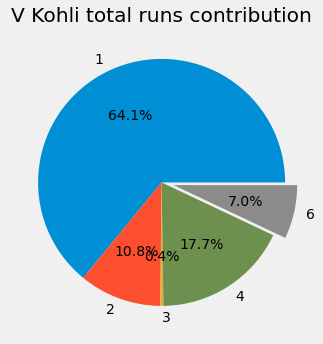

In [43]:
slices=[1741,293,11,482,191]
labels=[1,2,3,4,6]
explode=[0,0,0,0,0.1]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)
plt.title("V Kohli total runs contribution")
plt.tight_layout()
plt.show()

# Overall dismissal in IPL

In [44]:
data['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [45]:
# creating a dataframe of dismissal kind and its count
df = data['dismissal_kind'].value_counts().reset_index()
# renaming the columns
df.columns = ['Dismissal Kind', 'Count']
df

Dismissal Kind  Count
0                 caught   5348
1                 bowled   1581
2                run out    852
3                    lbw    540
4                stumped    278
5      caught and bowled    211
6           retired hurt     12
7             hit wicket     10
8  obstructing the field      2

In [46]:
fig = px.pie(df, values='Count', names='Dismissal Kind',title='Most common ways of dismissal in IPL')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Overall performance of bowlers

## Bowlers with most balls in super overs

In [47]:
#Selecting the super over if its 1 and bolwer
df = data.loc[data['is_super_over']==1, ['bowler','is_super_over']].copy()
#creating a new column containing the bowlers total super over  count
df['total_balls'] = df.groupby('bowler')['is_super_over'].transform('count')
df = df.drop('is_super_over',axis=1).drop_duplicates().reset_index(drop=True).sort_values('total_balls', ascending=False).head(15)
df

bowler  total_balls
0      JP Faulkner           11
1        JJ Bumrah            8
2      Kamran Khan            7
6    R Vinay Kumar            7
11       CH Morris            7
7         DW Steyn            6
8         UT Yadav            6
9        R Rampaul            6
10       SP Narine            6
4         J Theron            5
3       BAW Mendis            4
5   M Muralitharan            4
12      MG Johnson            4

In [48]:
fig = df.plot(kind='bar', x='bowler', y='total_balls', color='total_balls')
fig.update_layout(title='Bowlers who bowled most balls in super overs')
fig.show()

## Bowlers with best economy

In [49]:
df = data[['bowler', 'total_runs']].copy() #creating the dataframe with details of 'bowler', 'total_runs'
df['ball_count'] = df.groupby('bowler')['total_runs'].transform('count') #creating new colunm with bowlers total ball count
df['total_runs'] = df.groupby('bowler')['total_runs'].transform('sum') #creating a new column with total run given
df['runs_per_ball'] = df['total_runs'] / df['ball_count'] #creating wa new column for runs per ball
# removing the duplicate,resetting the index and arrenging the column descending order
df = df.drop_duplicates().reset_index(drop=True).sort_values('runs_per_ball').head(15)
df.head()

bowler  total_runs  ball_count  runs_per_ball
327  AC Gilchrist           0           1       0.000000
93       NB Singh          18          25       0.720000
353   Sachin Baby           8          10       0.800000
379        S Dube           9          11       0.818182
219     AM Rahane           5           6       0.833333

In [50]:
fig = df.plot(kind='bar', y='bowler', x='runs_per_ball', color='runs_per_ball')
fig.update_layout(title='Bowlers with best economy')
fig.show()

## Bowlers with worst economy

In [51]:
df = data[['bowler', 'total_runs']].copy()#creating the dataframe with details of 'bowler', 'total_runs'
df['ball_count'] = df.groupby('bowler')['total_runs'].transform('count')#creating new colunm with bowlers total ball count
df['total_runs'] = df.groupby('bowler')['total_runs'].transform('sum')#creating a new column with total run given
df['runs_per_ball'] = df['total_runs'] / df['ball_count']#creating wa new column for runs per ball
# removing the duplicate,resetting the index and arrenging the column descending order
df = df.drop_duplicates().sort_values('runs_per_ball').reset_index(drop=True).tail(15)
df.head()

bowler  total_runs  ball_count  runs_per_ball
390     MJ Henry          71          31       2.290323
391   P R Barman          56          24       2.333333
392     S Midhun          32          13       2.461538
393  Sunny Gupta          47          19       2.473684
394     MG Neser          62          25       2.480000

In [52]:
fig = df.plot(kind='bar', y='bowler', x='runs_per_ball', color='runs_per_ball')
fig.update_layout(title='Bowlers with worst economy')
fig.show()

## Best performing Bowler

In [53]:
data['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [54]:
df = data[['dismissal_kind','bowler']].copy()#creating the dataframe with details of 'dismissal_kind','bowler'
df = df.dropna()# dropping the NaN values
df['dismiss_count'] = df.groupby(['dismissal_kind','bowler'])['bowler'].transform('count')#creating a new column with bowler dismissal count
df = df[df['dismissal_kind'].isin(['caught', 'run out','bowled','run out','lbw','stumped','caught and bowled','hit wicket'])]
df = df.drop_duplicates()
df1 = df[df['dismissal_kind']=='caught'].sort_values('dismiss_count').tail(25)#creating a dataframe for dismissal kind caught

df2 = df[df['bowler'].isin(df1['bowler'].tolist())]#creating dataframe with same list of bowlers names in df1
df2 = df2[df2['dismissal_kind']=='run out'].sort_values('dismiss_count').tail(25)#creating a dataframe for dismissal kind run out

df3 = df[df['bowler'].isin(df1['bowler'].tolist())]
df3 = df3[df3['dismissal_kind']=='bowled'].sort_values('dismiss_count').tail(25)#creating a dataframe for dismissal kind bowled

df4 = df[df['bowler'].isin(df1['bowler'].tolist())]
df4 = df4[df4['dismissal_kind']=='lbw'].sort_values('dismiss_count').tail(25)#creating a dataframe for dismissal kind lbw

df5 = df[df['bowler'].isin(df1['bowler'].tolist())]
df5 = df5[df5['dismissal_kind']=='stumped'].sort_values('dismiss_count').tail(25)#creating a dataframe for dismissal kind stumped

df6 = df[df['bowler'].isin(df1['bowler'].tolist())]
df6 = df6[df6['dismissal_kind']=='caught and bowled'].sort_values('dismiss_count').tail(25)#creating a dataframe for dismissal kind caught and bowled

df7 = df[df['bowler'].isin(df1['bowler'].tolist())]
df7 = df7[df7['dismissal_kind']=='hit wicket'].sort_values('dismiss_count').tail(25)#creating a dataframe for dismissal kind hit wicket

df = pd.concat([df1,df2,df3,df4,df5,df6,df7],axis=0)#concating all newly created dataframes to df
df = df.reset_index(drop=True)
df

dismissal_kind           bowler  dismiss_count
0               caught        JJ Bumrah             54
1               caught          PP Ojha             57
2               caught         RP Singh             58
3               caught   MJ McClenaghan             58
4               caught         M Morkel             58
..                 ...              ...            ...
128  caught and bowled  Harbhajan Singh             10
129         hit wicket        JA Morkel              1
130         hit wicket         DW Steyn              1
131         hit wicket  Harbhajan Singh              1
132         hit wicket   MJ McClenaghan              1

[133 rows x 3 columns]

In [55]:
fig = df.plot(kind='bar', x='bowler', y='dismiss_count', color='dismissal_kind')
fig.update_layout(title='Best performing Bowler')
fig.show()

## Bowlers given most wide balls

In [56]:
#creating the dataframe with wide run greater than 0 and details of 'dismissal_kind','bowler' columns
df = data.loc[data['wide_runs']>0, ['bowler', 'wide_runs']].copy()
df['total_wides'] = df.groupby('bowler')['wide_runs'].transform('count')#creating a new colunm with total number of wides
df = df.drop('wide_runs', axis=1).drop_duplicates().reset_index(drop=True).sort_values('total_wides',ascending=False).head(25)
df.head()

bowler  total_wides
28   SL Malinga          129
116    DJ Bravo          119
49      P Kumar          112
41     UT Yadav           98
56    SR Watson           95

In [57]:
fig = df.plot(kind='bar', x='bowler', y='total_wides', color='total_wides')
fig.update_layout(title='Bowlers with most wide balls')
fig.show()

## Highest wicket by bowler in each season

In [58]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"] 
Hwicket=data[data["dismissal_kind"].isin(dismissal_kinds)]#creating a dataframe with dismissal kind present in list dismissal kinds
Hwicket=Hwicket.merge(matches,left_on='match_id',right_on='ID',how='outer')#merging the new dataframe with dataframe named matches
Hwicket=Hwicket.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()#grouping with season and bowler with total count of dismissal kind
Hwicket=Hwicket.sort_values('dismissal_kind',ascending=False)#arranging the dismissal count in descending order
Hwicket=Hwicket.drop_duplicates(subset=["season"],keep="first").sort_values(by='season')#removing all values of season except first occurrence
Hwicket.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)#renaming dismissal kinf to count wickets
Hwicket

season         bowler  count_wickets
75    2008.0  Sohail Tanvir             22
152   2009.0       RP Singh             23
241   2010.0        PP Ojha             21
366   2011.0     SL Malinga             28
435   2012.0       M Morkel             25
507   2013.0       DJ Bravo             32
637   2014.0      MM Sharma             23
693   2015.0       DJ Bravo             26
772   2016.0        B Kumar             23
859   2017.0        B Kumar             26
939   2018.0         AJ Tye             24
1043  2019.0    Imran Tahir             26

In [59]:
fig =Hwicket.plot(kind='bar', x='bowler', y='count_wickets', color='season')
fig.update_layout(title='Highest wicket by bowler in each season')
fig.show()

# Batsman Comparison

## Batsman with highest balls played

In [60]:
balls=data.groupby(['batsman'])['ball'].count().reset_index()# grouping the batsman with total ball count
balls.columns=['batsman','balls']# giving names to columns
ball_df = balls.sort_values('balls',ascending=False).head(25).reset_index(drop=True)
ball_df.head()

batsman  balls
0    V Kohli   4211
1   SK Raina   4044
2  RG Sharma   3816
3   S Dhawan   3776
4  G Gambhir   3524

In [61]:
fig = ball_df.plot(kind='bar', x='batsman', y='balls', color='balls')
fig.update_layout(title='Highest balls played')
fig.show()

## Batsman with highest runs

In [62]:
runs=data.groupby(['batsman'])['batsman_runs'].sum().reset_index()# grouping the batsman with total run count
runs.columns=['batsman','runs']#giving names to columns
runs_df=runs.sort_values(by=['runs'],ascending=False).reset_index(drop=True).head(25)
runs_df.head()

batsman  runs
0    V Kohli  5434
1   SK Raina  5415
2  RG Sharma  4914
3  DA Warner  4741
4   S Dhawan  4632

In [63]:
fig = runs_df.plot(kind='bar', x='batsman', y='runs', color='runs')
fig.update_layout(title='Highest Runs')
fig.show()

## Highest Runs by Batsman in each season

In [64]:
Hrun=matches[['ID','season']]# from datafram selecting column 'ID','season'
Hrun=Hrun.merge(data,left_on='ID',right_on='match_id',how='left')# merging the datafram with the dataframe named data
Hrun=Hrun.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()#grouping 'season','batsman' with sum of batmans run
Hrun=Hrun.sort_values('batsman_runs',ascending=0)#arranging the cloumn values
Hrun=Hrun.drop_duplicates(subset=["season"],keep="first").reset_index(drop=True)##removing all values of season except first occurrence
Hrun.sort_values(by='season')
Hrun

season        batsman  batsman_runs
0     2016        V Kohli           973
1     2018  KS Williamson           747
2     2013     MEK Hussey           733
3     2012       CH Gayle           733
4     2019      DA Warner           727
5     2014     RV Uthappa           660
6     2017      DA Warner           641
7     2010   SR Tendulkar           618
8     2008       SE Marsh           616
9     2011       CH Gayle           608
10    2009      ML Hayden           572
11    2015      DA Warner           562

In [65]:
fig =Hrun.plot(kind='bar', x='batsman', y='batsman_runs', color='season')
fig.update_layout(title='Highest Runs by Batsman in each season')
fig.show()

## Top 10 Batsman

In [66]:
max_runs=data.groupby(['batsman'])['batsman_runs'].sum().reset_index()#grouping batsman with sum of batsman run
max_runs.columns=['batsman','runs']#giving name to columns
max_runs_df=runs.sort_values(by=['runs'],ascending=False).reset_index(drop=True)#sorting the values and resetting the index
max_runs_df.head(10)

batsman  runs
0         V Kohli  5434
1        SK Raina  5415
2       RG Sharma  4914
3       DA Warner  4741
4        S Dhawan  4632
5        CH Gayle  4560
6        MS Dhoni  4477
7      RV Uthappa  4446
8  AB de Villiers  4428
9       G Gambhir  4223

In [67]:
fig = max_runs_df.head(10).plot(kind='bar', x='batsman', y='runs', color='runs')
fig.update_layout(title='Top 10 batsman')
fig.show()

## Top Individual Scores

In [68]:
data['batting_team'].unique(),len(data['batting_team'].unique())# finding unique names of batting teams and their total number

(array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
        'Mumbai Indians', 'Rising Pune Supergiants', 'Gujarat Lions',
        'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
        'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
       dtype=object),
 11)

In [69]:
#creating a dataframe with details of "match_id","batsman",'batting_team',"batsman_runs"
df = data[["match_id","batsman",'batting_team',"batsman_runs"]].copy()
#creating a new column having batsman max. run for a team 
df["batsman_runs"] = df.groupby(["match_id","batsman",'batting_team'])["batsman_runs"].transform('sum')
#dropping the duplicate,arranging the values and resetting the index
df = df.drop_duplicates().sort_values(["batsman_runs"],ascending=False).head(40).reset_index(drop=True)
df.head(10)

match_id         batsman                 batting_team  batsman_runs
0       411        CH Gayle  Royal Challengers Bangalore           175
1        60     BB McCullum        Kolkata Knight Riders           158
2       562  AB de Villiers  Royal Challengers Bangalore           133
3      7935         RR Pant               Delhi Capitals           130
4       620  AB de Villiers  Royal Challengers Bangalore           129
5       372        CH Gayle  Royal Challengers Bangalore           128
6       206         M Vijay          Chennai Super Kings           127
7        36       DA Warner          Sunrisers Hyderabad           126
8       516        V Sehwag              Kings XI Punjab           122
9      7953       SR Watson          Chennai Super Kings           121

In [70]:
fig = df.plot(kind='bar', x='batsman', y="batsman_runs", color='batting_team')
fig.update_layout(title='Top Individual Scores')
fig.show()

## Batsmen with best strike rate

In [71]:
df = data[['batsman', 'total_runs']].copy() #creating a new dataframe with details of 'batsman', 'total_runs columns
df['ball_count'] = df.groupby('batsman')['total_runs'].transform('count')#creating a new column with batsman total ball count
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')#creating a new column with batsman total run count
df['Strike Rate'] = (df['total_runs'] / df['ball_count']) * 100 #creating a new column with batsman strike rate
df = df.drop_duplicates().sort_values('Strike Rate',ascending=False).head(25).reset_index(drop=True)
df.head(10)

batsman  total_runs  ball_count  Strike Rate
0         S Sharma          10           4   250.000000
1       B Stanlake           5           2   250.000000
2         Umar Gul          44          19   231.578947
3         RS Sodhi           4           2   200.000000
4  KMDN Kulasekara           6           3   200.000000
5       ER Dwivedi          29          15   193.333333
6       AD Russell        1527         803   190.161893
7    Shahid Afridi          82          46   178.260870
8        SP Narine         856         481   177.962578
9            M Ali         325         183   177.595628

In [72]:
fig = df.plot(kind='bar', y='Strike Rate', x='batsman', color='Strike Rate')
fig.update_layout(title='Batsmen with best strike rate')
fig.show()

## Batsmen with worst strike rate

In [73]:
df = data[['batsman', 'total_runs']].copy()#creating a new dataframe with details of 'batsman', 'total_runs columns
df['ball_count'] = df.groupby('batsman')['total_runs'].transform('count')#creating a new column with batsman total ball count
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')#creating a new column with batsman total run count
df['Strike Rate'] = (df['total_runs'] / df['ball_count']) * 100#creating a new column with batsman strike rate
df = df[df['Strike Rate']>0].drop_duplicates().sort_values('Strike Rate').head(15).reset_index(drop=True)
df.head(10)

batsman  total_runs  ball_count  Strike Rate
0            S Ladda           1          10    10.000000
1          P Krishna           1           7    14.285714
2       Shoaib Ahmed           1           6    16.666667
3           H Gurney           1           5    20.000000
4        RS Gavaskar           2           8    25.000000
5            A Singh           3          10    30.000000
6          DP Nannes           4          13    30.769231
7      DJ Muthuswami           1           3    33.333333
8         L Plunkett           1           3    33.333333
9  Mustafizur Rahman           1           3    33.333333

In [74]:
fig = df.plot(kind='bar', y='Strike Rate', x='batsman', color='Strike Rate')
fig.update_layout(title='Batsmen with worst strike rate')
fig.show()

## Batsman who scored most runs in super overs

In [75]:
df = data.loc[data['is_super_over']==1, ['batsman','total_runs']].copy()#creating a new datafrane with super over 1 and details of 'batsman','total_runs' 
df['total_runs'] = df.groupby('batsman')['total_runs'].transform('sum')#crearing a new column with batman total run
df = df.drop_duplicates().sort_values('total_runs', ascending=False).head(15).reset_index(drop=True)#remove duplicate,sort valuse and restting the index
df.head(10)

batsman  total_runs
0        CH Gayle          26
1       YK Pathan          18
2        CL White          17
3        SE Marsh          14
4  AB de Villiers          13
5       IK Pathan          11
6       SPD Smith          11
7      KA Pollard          10
8        SK Raina           8
9       MK Pandey           8

In [76]:
fig = df.plot(kind='bar', x='batsman', y='total_runs', color='total_runs')
fig.update_layout(title='Batsman who scored most runs in super overs')
fig.show()

# Fielders

## Best performing fielders

In [77]:
df = data[['dismissal_kind','fielder']].copy()#creating a dataframe with details of 'dismissal_kind','fielder' columns
df = df.dropna() #drop NaN values
df['dismiss_count'] = df.groupby(['dismissal_kind','fielder'])['fielder'].transform('count')#creating a new column with total dismissal count for a fielder
df = df[df['dismissal_kind'].isin(['caught', 'run out'])]#keeping the dismissal kind 'caught'and 'run out'
df = df.drop_duplicates()#dropping any duplicate values
df1 = df[df['dismissal_kind']=='caught'].sort_values('dismiss_count',ascending=0).head(25)#creating a dataframe for dismissal kind caught
df2 = df[df['fielder'].isin(df1['fielder'].tolist())]#creating dataframe with same list of fielder in df1
df2 = df2[df2['dismissal_kind']=='run out'].sort_values('dismiss_count',ascending=0).head(25)#creating a dataframe for dismissal kind run out
df = pd.concat([df1,df2],axis=0)#concatinating the data to df
df = df.reset_index(drop=True)#resetting the index
df.head()

dismissal_kind         fielder  dismiss_count
0         caught      KD Karthik            109
1         caught        SK Raina             99
2         caught        MS Dhoni             98
3         caught  AB de Villiers             93
4         caught      RV Uthappa             84

In [78]:
fig = df.plot(kind='bar', x='fielder', y='dismiss_count', color='dismissal_kind')
fig.update_layout(title='Best performing fielders')
fig.show()

# Players with most Player of the match titles and their teams

In [79]:
Tplayer = matches['player_of_match'].value_counts().reset_index()['index'].tolist()[:25]#creating list of player of match
df = matches[['winner','player_of_match']].dropna()#creating a dataframe with details of 'winner' and 'player_of_match' columns
#creating a new column with player of match count
df['POM_count'] = df.groupby(['winner','player_of_match'])['player_of_match'].transform('count')
#dropping the duplicate,arranging the values and resetting the index
df = df.drop_duplicates().sort_values('POM_count',ascending=False).reset_index(drop=True)
df = df[df['player_of_match'].isin(Tplayer)]#editing the playes name with Tplayer as we are taking only top 25 names
df.head()

winner player_of_match  POM_count
0  Royal Challengers Bangalore  AB de Villiers         18
1  Royal Challengers Bangalore        CH Gayle         17
2          Chennai Super Kings        MS Dhoni         15
3               Mumbai Indians       RG Sharma         14
4          Sunrisers Hyderabad       DA Warner         12

In [80]:
fig = df.plot(kind='bar', x='player_of_match', y='POM_count', color='winner')
fig.update_layout(title='Players with most Player of the match titles and their teams')
fig.show()

# Best Stumpers and their teams

In [81]:
#creating a dataframe with details of 'bowling_team','dismissal_kind','fielder' columns
df = data[['bowling_team','dismissal_kind','fielder']].copy()
df = df.dropna()#droping the NaN values
df = df[df['dismissal_kind']=='stumped'] #selecting dismissal kind equal to stumped
#creating new column with total dismissal kind for a fielder
df['stump_count'] = df.groupby(['bowling_team','fielder'])['dismissal_kind'].transform('count')
#df
df = df.drop('dismissal_kind', axis=1).drop_duplicates().sort_values('stump_count',ascending=False).head(25).reset_index(drop=True)
df.head()

bowling_team       fielder  stump_count
0    Chennai Super Kings      MS Dhoni           31
1  Kolkata Knight Riders    RV Uthappa           22
2         Delhi Capitals    KD Karthik           15
3    Sunrisers Hyderabad  AC Gilchrist           13
4        Kings XI Punjab       WP Saha           12

In [82]:
fig = df.plot(kind='bar', x='fielder', y='stump_count', color='bowling_team')
fig.update_layout(title='Best Stumpers and their teams')
fig.show()

# Toss decision

## Season wise toss decision

In [83]:
df = matches[['season', 'toss_decision']].copy()#creating a dataframe with details of 'season' and 'toss_decision' columns
#creating a new column with total number of toss decision count
df['count'] = df.groupby(['season', 'toss_decision'])['toss_decision'].transform('count')
df = df.drop_duplicates().reset_index(drop=True)#dropping the duplicate and reseting the index
df.head()

season toss_decision  count
0    2017         field     48
1    2017           bat     10
2    2008         field     32
3    2008           bat     26
4    2009         field     22

In [84]:
fig = df.plot(kind='bar', x='season', y='count', color='toss_decision', barmode='group')
fig.update_layout(title='Toss wins and decisions')
fig.show()

## Team wise field and bat decision

In [85]:
#creating a dataframe with details of 'toss_winner' and 'toss_decision' columns
df = matches[['toss_winner', 'toss_decision']].copy()
#creating a new column with total number of toss decision count 
df['count'] = df.groupby(['toss_winner', 'toss_decision'])['toss_decision'].transform('count')
#dropping the duplicate and reseting the index
df = df.drop_duplicates().sort_values('count',ascending=False).reset_index(drop=True)
df.head()

toss_winner toss_decision  count
0        Kolkata Knight Riders         field     62
1  Royal Challengers Bangalore         field     60
2               Delhi Capitals         field     58
3              Kings XI Punjab         field     55
4               Mumbai Indians         field     54

In [86]:
fig = df.plot(kind='bar', x='toss_winner', y='count', color='toss_decision', barmode='group')
fig.update_layout(title='Team wise field and bat decision')
fig.show()

# Biggest win by runs in each season

In [87]:
df=matches.groupby('season')['win_by_runs'].max().reset_index().sort_values('win_by_runs',ascending=False)
df

season  win_by_runs
9     2017          146
8     2016          144
0     2008          140
7     2015          138
5     2013          130
11    2019          118
3     2011          111
10    2018          102
2     2010           98
6     2014           93
1     2009           92
4     2012           86

In [88]:
fig = df.plot(kind='bar', x='season', y='win_by_runs', color='win_by_runs')
fig.update_layout(title=' Biggest win by runs in each season')
fig.show()

## Total number of times Team won matches after batting first

In [89]:
batting_1=matches[matches['win_by_runs']!=0]#creating a dataframe where win by runs is not equal to zero

In [90]:
batting_1.head()

ID  season       city        date                    team1  \
0    1    2017  Hyderabad  2017-04-05      Sunrisers Hyderabad   
8    9    2017       Pune  2017-04-11           Delhi Capitals   
13  14    2017    Kolkata  2017-04-15    Kolkata Knight Riders   
14  15    2017      Delhi  2017-04-15           Delhi Capitals   
16  17    2017  Bengaluru  2017-04-16  Rising Pune Supergiants   

                          team2                  toss_winner toss_decision  \
0   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
8       Rising Pune Supergiants      Rising Pune Supergiants         field   
13          Sunrisers Hyderabad          Sunrisers Hyderabad         field   
14              Kings XI Punjab               Delhi Capitals           bat   
16  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

    result  dl_applied                   winner  win_by_runs  win_by_wickets  \
0   normal           0      Sunrisers Hyderabad           35               0   
8   normal           0           Delhi Capitals           97               0   
13  normal           0    Kolkata Knight Riders           17               0   
14  normal           0           Delhi Capitals           51               0   
16  normal           0  Rising Pune Supergiants           27               0   

   player_of_match                                      venue  \
0     Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
8        SV Samson    Maharashtra Cricket Association Stadium   
13      RV Uthappa                               Eden Gardens   
14     CJ Anderson                           Feroz Shah Kotla   
16       BA Stokes                      M Chinnaswamy Stadium   

                  umpire1        umpire2  
0             AY Dandekar       NJ Llong  
8             AY Dandekar         S Ravi  
13            AY Dandekar       NJ Llong  
14               YC Barde    Nitin Menon  
16  KN Ananthapadmanabhan  C Shamshuddin

In [91]:
df9=batting_1['winner'].value_counts().reset_index()#creating a dataframe containing winner team count
df9.columns=['team', 'win']#giving names to columns
df9

team  win
0                Mumbai Indians   57
1           Chennai Super Kings   52
2           Sunrisers Hyderabad   48
3               Kings XI Punjab   38
4         Kolkata Knight Riders   36
5   Royal Challengers Bangalore   34
6                Delhi Capitals   28
7              Rajasthan Royals   27
8       Rising Pune Supergiants   13
9          Kochi Tuskers Kerala    2
10                Gujarat Lions    1

In [92]:
fig = df9.plot(kind='bar', x='team', y='win', color='win')
fig.update_layout(title='Total number of times Team won matches after batting first')
fig.show()

## Total number of times Team won matches after batting second

In [93]:
batting_2=matches[matches['win_by_wickets']!=0]#creating a dataframe where win by wickets is not equal to zero
batting_2.head()

ID  season       city        date                    team1  \
1   2    2017       Pune  2017-04-06           Mumbai Indians   
2   3    2017     Rajkot  2017-04-07            Gujarat Lions   
3   4    2017     Indore  2017-04-08  Rising Pune Supergiants   
5   6    2017  Hyderabad  2017-04-09            Gujarat Lions   
6   7    2017     Mumbai  2017-04-09    Kolkata Knight Riders   

                     team2              toss_winner toss_decision  result  \
1  Rising Pune Supergiants  Rising Pune Supergiants         field  normal   
2    Kolkata Knight Riders    Kolkata Knight Riders         field  normal   
3          Kings XI Punjab          Kings XI Punjab         field  normal   
5      Sunrisers Hyderabad      Sunrisers Hyderabad         field  normal   
6           Mumbai Indians           Mumbai Indians         field  normal   

   dl_applied                   winner  win_by_runs  win_by_wickets  \
1           0  Rising Pune Supergiants            0               7   
2           0    Kolkata Knight Riders            0              10   
3           0          Kings XI Punjab            0               6   
5           0      Sunrisers Hyderabad            0               9   
6           0           Mumbai Indians            0               4   

  player_of_match                                      venue         umpire1  \
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   
2         CA Lynn     Saurashtra Cricket Association Stadium     Nitin Menon   
3      GJ Maxwell                     Holkar Cricket Stadium    AK Chaudhary   
5     Rashid Khan  Rajiv Gandhi International Stadium, Uppal      A Deshmukh   
6          N Rana                           Wankhede Stadium     Nitin Menon   

         umpire2  
1         S Ravi  
2      CK Nandan  
3  C Shamshuddin  
5       NJ Llong  
6      CK Nandan

In [94]:
df9=batting_2['winner'].value_counts().reset_index()#creating a dataframe containing winner team count
df9.columns=['team', 'win']#giving names to columns
df9

team  win
0         Kolkata Knight Riders   56
1                Mumbai Indians   50
2   Royal Challengers Bangalore   48
3           Chennai Super Kings   48
4                Delhi Capitals   47
5              Rajasthan Royals   46
6               Kings XI Punjab   42
7           Sunrisers Hyderabad   38
8       Rising Pune Supergiants   14
9                 Gujarat Lions   12
10         Kochi Tuskers Kerala    4

In [95]:
fig = df9.plot(kind='bar', x='team', y='win', color='win')
fig.update_layout(title='Total number of times Team won matches after batting second')
fig.show()

# Total matches played across each season

In [96]:
df9=matches.groupby(['season'])['ID'].count().reset_index().rename(columns={'ID':'total'})
df9

season  total
0     2008     58
1     2009     57
2     2010     60
3     2011     72
4     2012     74
5     2013     76
6     2014     60
7     2015     57
8     2016     60
9     2017     58
10    2018     60
11    2019     58

In [97]:
fig = df9.plot(kind='bar', x='season', y='total', color='total')
fig.update_layout(title='Matches played across each season')
fig.show()

## Matches played by each team

In [98]:
TotalMataches=pd.concat([matches['team1'],matches['team2']],axis=1)#creating a dataframe with details of team1 and team2 columns
TotalMataches

team1                        team2
0        Sunrisers Hyderabad  Royal Challengers Bangalore
1             Mumbai Indians      Rising Pune Supergiants
2              Gujarat Lions        Kolkata Knight Riders
3    Rising Pune Supergiants              Kings XI Punjab
5              Gujarat Lions          Sunrisers Hyderabad
..                       ...                          ...
750      Chennai Super Kings              Kings XI Punjab
751    Kolkata Knight Riders               Mumbai Indians
752      Chennai Super Kings               Mumbai Indians
754           Delhi Capitals          Chennai Super Kings
755           Mumbai Indians          Chennai Super Kings

[750 rows x 2 columns]

In [99]:
Tmatches=(TotalMataches['team1'].value_counts()+TotalMataches['team2'].value_counts()).sort_values(ascending=False).reset_index()
Tmatches.columns=['team_name','Matches played']#giving names to columns
Tmatches

team_name  Matches played
0                Mumbai Indians             187
1           Sunrisers Hyderabad             182
2         Kolkata Knight Riders             178
3   Royal Challengers Bangalore             176
4               Kings XI Punjab             176
5                Delhi Capitals             173
6           Chennai Super Kings             164
7              Rajasthan Royals             145
8       Rising Pune Supergiants              75
9                 Gujarat Lions              30
10         Kochi Tuskers Kerala              14

In [100]:
fig =Tmatches.plot(kind='bar', x='team_name', y='Matches played', color='Matches played')
fig.update_layout(title='Matches played by each team')
fig.show()

## Total matches played and won by teams

In [101]:
win=pd.DataFrame(matches['winner'].value_counts()).reset_index()#creating a new dataframe with winner teams total count
win.columns=['team_name','wins']#renaming the columns
#win
player=Tmatches.merge(win,left_on='team_name',right_on='team_name',how='inner')#merging win and Tmatches dataframes

In [102]:
player.columns=['team','matches_played','wins']#gining names to columns
player.sort_values('wins',ascending=False)#sorting the values


team  matches_played  wins
0                Mumbai Indians             187   109
6           Chennai Super Kings             164   100
2         Kolkata Knight Riders             178    92
1           Sunrisers Hyderabad             182    87
3   Royal Challengers Bangalore             176    83
4               Kings XI Punjab             176    82
5                Delhi Capitals             173    76
7              Rajasthan Royals             145    75
8       Rising Pune Supergiants              75    27
9                 Gujarat Lions              30    13
10         Kochi Tuskers Kerala              14     6

In [103]:
player['%win']=(player['wins']/player['matches_played'])*100#calculating the win percentage
player.sort_values('%win',ascending=False)#sorting the values
player

team  matches_played  wins       %win
0                Mumbai Indians             187   109  58.288770
1           Sunrisers Hyderabad             182    87  47.802198
2         Kolkata Knight Riders             178    92  51.685393
3   Royal Challengers Bangalore             176    83  47.159091
4               Kings XI Punjab             176    82  46.590909
5                Delhi Capitals             173    76  43.930636
6           Chennai Super Kings             164   100  60.975610
7              Rajasthan Royals             145    75  51.724138
8       Rising Pune Supergiants              75    27  36.000000
9                 Gujarat Lions              30    13  43.333333
10         Kochi Tuskers Kerala              14     6  42.857143

In [104]:
df = player[['team','matches_played','wins']].copy()
df = df.drop_duplicates().sort_values('wins',ascending=False).reset_index(drop=True)
fig = df.plot(kind='bar', x='team', y='matches_played', color='wins')
fig.update_layout(title='Total matches played and won by teams')
fig.show()

## Team won maximum matches per season

In [105]:
Tseason = matches.groupby('season')['winner'].value_counts()
#Tseason.head(25)

In [106]:
year = 2008
perseason = pd.DataFrame(columns=['year', 'team_name', 'totalwins'])
for x in Tseason.items():#it creates a tuple of Tseason,
    if x[0][0]==year: #selecting 0 in 0 position of tuple,
        print(x)
        seasondetails = pd.DataFrame({'year': [x[0][0]],'team_name': [x[0][1]],'totalwins': [x[1]]})
        perseason = perseason.append(seasondetails)#appending the values in dataframe
        year += 1 
  

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Capitals'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [107]:
perseason

year              team_name totalwins
0  2008       Rajasthan Royals        13
0  2009         Delhi Capitals        10
0  2010         Mumbai Indians        11
0  2011    Chennai Super Kings        11
0  2012  Kolkata Knight Riders        12
0  2013         Mumbai Indians        13
0  2014        Kings XI Punjab        12
0  2015    Chennai Super Kings        10
0  2016    Sunrisers Hyderabad        11
0  2017         Mumbai Indians        12
0  2018    Chennai Super Kings        11
0  2019         Mumbai Indians        11

## Team won maximum season

In [108]:
total_win=perseason['team_name'].value_counts().reset_index()
total_win.columns=['team','total win']
total_win

team  total win
0         Mumbai Indians          4
1    Chennai Super Kings          3
2        Kings XI Punjab          1
3    Sunrisers Hyderabad          1
4       Rajasthan Royals          1
5  Kolkata Knight Riders          1
6         Delhi Capitals          1

##### Replacing the Team Names with their abbreviations

In [109]:
#creating a dictionary of team names abbrevations
Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
    'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
    'Delhi Capitals':'DC',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
    'Kochi Tuskers Kerala':'KTK',
       'Rising Pune Supergiants':'RPS'
}

In [110]:
data['batting_team']=data['batting_team'].map(Teams)#mapping the dictionary names with batting_team name
data['bowling_team']=data['bowling_team'].map(Teams)

In [111]:
data.head()

match_id  inning batting_team bowling_team  over  ball    batsman  \
0         1       1          SRH          RCB     1     1  DA Warner   
1         1       1          SRH          RCB     1     2  DA Warner   
2         1       1          SRH          RCB     1     3  DA Warner   
3         1       1          SRH          RCB     1     4  DA Warner   
4         1       1          SRH          RCB     1     5  DA Warner   

  non_striker    bowler  is_super_over  ...  bye_runs  legbye_runs  \
0    S Dhawan  TS Mills              0  ...         0            0   
1    S Dhawan  TS Mills              0  ...         0            0   
2    S Dhawan  TS Mills              0  ...         0            0   
3    S Dhawan  TS Mills              0  ...         0            0   
4    S Dhawan  TS Mills              0  ...         0            0   

   noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
0            0             0             0           0           0   
1            0             0             0           0           0   
2            0             0             4           0           4   
3            0             0             0           0           0   
4            0             0             0           2           2   

   player_dismissed dismissal_kind fielder  
0               NaN            NaN     NaN  
1               NaN            NaN     NaN  
2               NaN            NaN     NaN  
3               NaN            NaN     NaN  
4               NaN            NaN     NaN  

[5 rows x 21 columns]

In [112]:
batting_inning=data.groupby(['match_id','inning','batting_team'])[['total_runs']].sum().reset_index()
batting_inning.drop('match_id',axis=1,inplace=True)
batting_inning.head()

inning batting_team  total_runs
0       1          SRH         207
1       2          RCB         172
2       1           MI         184
3       2          RPS         187
4       1           GL         183

In [113]:
inning1=batting_inning[batting_inning['inning']==1]#creating a dataframe for inning 1
inning2=batting_inning[batting_inning['inning']==2]#creating a dataframe for inning 2
inning1.head()

inning batting_team  total_runs
0       1          SRH         207
2       1           MI         184
4       1           GL         183
6       1          RPS         163
8       1          RCB         157

## Team performance while batting 1st inning

Text(0.5, 1.0, 'Boxplot for batting in first inning')

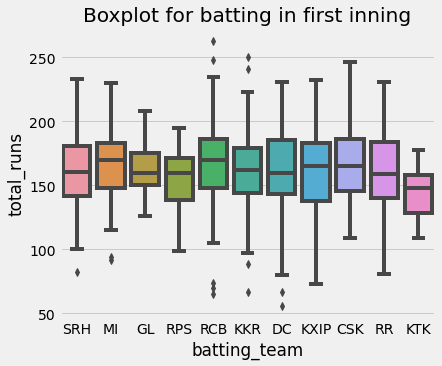

In [114]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)
plt.title('Boxplot for batting in first inning')

##### According to this plot, the batting by CSK seems best. 

## Team performance while batting 2nd inning

Text(0.5, 1.0, 'Boxplot for batting in second inning')

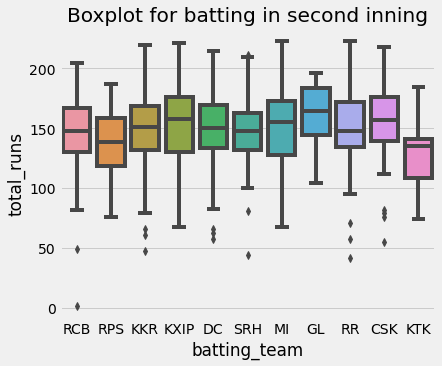

In [115]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)
plt.title('Boxplot for batting in second inning')

##### According to this plot also the batting by CSK seems best.

In [116]:
Teams={
   'RCB': 'Royal Challengers Bangalore', 
    'SRH':'Sunrisers Hyderabad',
    'MI':'Mumbai Indians',
    'KKR':'Kolkata Knight Riders', 
    'GL':'Gujarat Lions',
    'KXIP':'Kings XI Punjab',
    'DC':'Delhi Capitals',
    'CSK':'Chennai Super Kings',
    'RR':'Rajasthan Royals',
    'KTK':'Kochi Tuskers Kerala',
    'RPS':'Rising Pune Supergiants'
}

In [117]:
data['batting_team']=data['batting_team'].map(Teams)
data['bowling_team']=data['bowling_team'].map(Teams)

## Most common results

In [118]:
matches['result'].unique()

array(['normal', 'tie'], dtype=object)

In [119]:
Mresult = matches['result'].value_counts().reset_index()#creating a dataframe with details of result column and its value count
Mresult.columns = ['result', 'count']#giving name to the column
fig = px.pie(Mresult, values='count', names='result',title='Most common results')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## Number of times team won match in a venue

In [120]:
Hwin_venue = matches[['venue','winner']].copy()#creating a dataframe with details of 'venue' and 'winner' columns
#creating a cloumn with winner count
Hwin_venue['win count'] = Hwin_venue.groupby(['venue','winner'])['winner'].transform('count')
#dropping the duplicates,sroting values and resetting index
Hwin_venue = Hwin_venue.drop_duplicates().sort_values('win count',ascending=False).reset_index(drop=True)
Hwin_venue.head()

venue                       winner  win count
0                     Eden Gardens        Kolkata Knight Riders         45
1                 Wankhede Stadium               Mumbai Indians         42
2  MA Chidambaram Stadium, Chepauk          Chennai Super Kings         34
3            M Chinnaswamy Stadium  Royal Challengers Bangalore         33
4           Sawai Mansingh Stadium             Rajasthan Royals         32

In [121]:
fig = Hwin_venue.plot(kind='bar', x='winner', y='win count', color='venue')
fig.update_layout(title='Number of times team won match in a venue')
fig.show()

## Teams with most wins and the cities

In [122]:
Hwin_city = matches[['city','winner']].copy()#creating the dataframe with details of 'city' and 'winner' column
#creating the column for winning team's win count
Hwin_city['win'] = Hwin_city.groupby(['city','winner'])['winner'].transform('count')
Hwin_city = Hwin_city.drop_duplicates().sort_values('win',ascending=False).reset_index(drop=True)
Hwin_city.head()

city                       winner  win
0     Mumbai               Mumbai Indians   53
1    Kolkata        Kolkata Knight Riders   45
2    Chennai          Chennai Super Kings   40
3  Bengaluru  Royal Challengers Bangalore   36
4  Hyderabad          Sunrisers Hyderabad   33

In [123]:
fig = Hwin_city.plot(kind='bar', x='winner', y='win', color='city')
fig.update_layout(title='Teams with most wins and the cities')
fig.show()

## Cities hosted maximum IPL matches

In [124]:
#creating a dataframe grouped by city and counting the ctiy count
ct=matches.groupby('city').apply(lambda i:i['city'].count()).reset_index(name='Match Counts')
#drop duplicate,sort values and reset index
highestplayed_city=ct.drop_duplicates().sort_values(by='Match Counts',ascending=False).reset_index(drop=True)
ct=highestplayed_city[:25]#selecting 1st 15 rows
print('Top 25 Cities with the maximum number of Matches Played:\n',ct)
fig = ct.plot(kind='bar', x='city', y='Match Counts', color='Match Counts')
fig.update_layout(title='Teams with most wins and the cities')
fig.show()

Top 25 Cities with the maximum number of Matches Played:
               city  Match Counts
0           Mumbai           101
1          Kolkata            77
2        Bengaluru            76
3            Delhi            73
4        Hyderabad            64
5          Chennai            57
6           Jaipur            47
7       Chandigarh            46
8             Pune            38
9           Durban            15
10       Ahmedabad            12
11   Visakhapatnam            12
12       Centurion            12
13          Mohali            10
14          Rajkot            10
15      Dharamsala             9
16          Indore             9
17    Johannesburg             8
18          Ranchi             7
19  Port Elizabeth             7
20       Cape Town             7
21           Dubai             7
22         Cuttack             7
23       Abu Dhabi             7
24          Raipur             6


## Classification

Now, we use the training and split method to build a model to predict the winner of match and creating a report for the F1 score of the model.
we will use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine(SVM)
- Logistic Regression
- Random forest
- Perceptron

In [125]:
matches.head()

ID  season       city        date                    team1  \
0   1    2017  Hyderabad  2017-04-05      Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06           Mumbai Indians   
2   3    2017     Rajkot  2017-04-07            Gujarat Lions   
3   4    2017     Indore  2017-04-08  Rising Pune Supergiants   
5   6    2017  Hyderabad  2017-04-09            Gujarat Lions   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1      Rising Pune Supergiants      Rising Pune Supergiants         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
5          Sunrisers Hyderabad          Sunrisers Hyderabad         field   

   result  dl_applied                   winner  win_by_runs  win_by_wickets  \
0  normal           0      Sunrisers Hyderabad           35               0   
1  normal           0  Rising Pune Supergiants            0               7   
2  normal           0    Kolkata Knight Riders            0              10   
3  normal           0          Kings XI Punjab            0               6   
5  normal           0      Sunrisers Hyderabad            0               9   

  player_of_match                                      venue         umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal     AY Dandekar   
1       SPD Smith    Maharashtra Cricket Association Stadium  A Nand Kishore   
2         CA Lynn     Saurashtra Cricket Association Stadium     Nitin Menon   
3      GJ Maxwell                     Holkar Cricket Stadium    AK Chaudhary   
5     Rashid Khan  Rajiv Gandhi International Stadium, Uppal      A Deshmukh   

         umpire2  
0       NJ Llong  
1         S Ravi  
2      CK Nandan  
3  C Shamshuddin  
5       NJ Llong

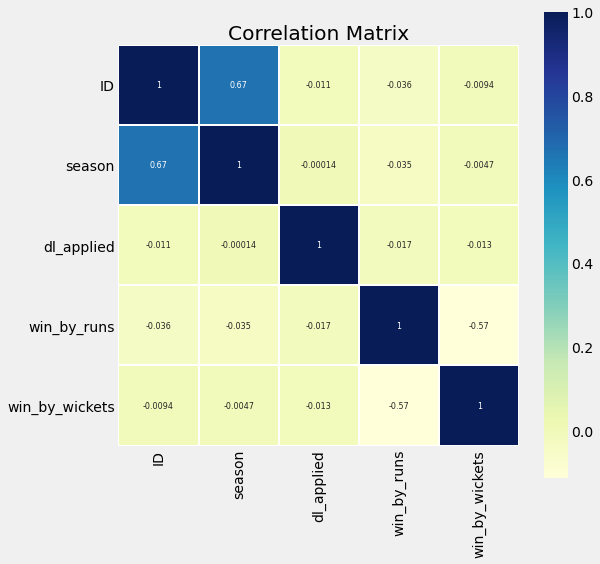

In [126]:
#ploting the correlation matrix to see the relation between different columns
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(matches.corr(),vmin=data.corr().values.min(), vmax=1, square=True,
            cmap="YlGnBu", linewidths=1, annot=True, annot_kws={"fontsize":8}, ax=ax) 
plt.title('Correlation Matrix')
plt.show()

In [127]:
matches.isnull().sum()# checking the null values

ID                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [128]:
matches['winner'].unique()#finding unique names of winning teams

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Mumbai Indians',
       'Delhi Capitals', 'Gujarat Lions', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala'],
      dtype=object)

In [129]:
df = matches.drop(['ID', 'date','umpire1', 'umpire2','toss_decision','venue'], axis = 1)#creating new daaframe with some column droped

In [130]:
df.info()#checking new dataframe's object type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 0 to 755
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           750 non-null    int64 
 1   city             750 non-null    object
 2   team1            750 non-null    object
 3   team2            750 non-null    object
 4   toss_winner      750 non-null    object
 5   result           750 non-null    object
 6   dl_applied       750 non-null    int64 
 7   winner           750 non-null    object
 8   win_by_runs      750 non-null    int64 
 9   win_by_wickets   750 non-null    int64 
 10  player_of_match  750 non-null    object
dtypes: int64(4), object(7)
memory usage: 70.3+ KB


In [131]:
df.head()

season       city                    team1                        team2  \
0    2017  Hyderabad      Sunrisers Hyderabad  Royal Challengers Bangalore   
1    2017       Pune           Mumbai Indians      Rising Pune Supergiants   
2    2017     Rajkot            Gujarat Lions        Kolkata Knight Riders   
3    2017     Indore  Rising Pune Supergiants              Kings XI Punjab   
5    2017  Hyderabad            Gujarat Lions          Sunrisers Hyderabad   

                   toss_winner  result  dl_applied                   winner  \
0  Royal Challengers Bangalore  normal           0      Sunrisers Hyderabad   
1      Rising Pune Supergiants  normal           0  Rising Pune Supergiants   
2        Kolkata Knight Riders  normal           0    Kolkata Knight Riders   
3              Kings XI Punjab  normal           0          Kings XI Punjab   
5          Sunrisers Hyderabad  normal           0      Sunrisers Hyderabad   

   win_by_runs  win_by_wickets player_of_match  
0           35               0    Yuvraj Singh  
1            0               7       SPD Smith  
2            0              10         CA Lynn  
3            0               6      GJ Maxwell  
5            0               9     Rashid Khan

In [132]:
#converting categorical data to numeric
from sklearn.preprocessing import LabelEncoder
var_mod = ['city', 'team1', 'team2','winner', 'result','player_of_match','toss_winner']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

season             int64
city               int32
team1              int32
team2              int32
toss_winner        int32
result             int32
dl_applied         int64
winner             int32
win_by_runs        int64
win_by_wickets     int64
player_of_match    int32
dtype: object

In [133]:
df.head()

season  city  team1  team2  toss_winner  result  dl_applied  winner  \
0    2017    14     10      9            9       0           0      10   
1    2017    26      6      8            8       0           0       8   
2    2017    28      2      5            5       0           0       5   
3    2017    15      8      3            3       0           0       3   
5    2017    14      2     10           10       0           0      10   

   win_by_runs  win_by_wickets  player_of_match  
0           35               0              224  
1            0               7              199  
2            0              10               34  
3            0               6               61  
5            0               9              173

In [134]:
len(df['city'].unique())

32

In [135]:
df['team1'].unique()

array([10,  6,  2,  8,  5,  9,  1,  3,  0,  7,  4])

In [136]:
#separating the data in features and target
x = df[['season', 'city', 'team1', 'team2','result', 'dl_applied', 'win_by_runs', 'win_by_wickets',
'player_of_match','toss_winner']]
y = df['winner']
x.head()

season  city  team1  team2  result  dl_applied  win_by_runs  \
0    2017    14     10      9       0           0           35   
1    2017    26      6      8       0           0            0   
2    2017    28      2      5       0           0            0   
3    2017    15      8      3       0           0            0   
5    2017    14      2     10       0           0            0   

   win_by_wickets  player_of_match  toss_winner  
0               0              224            9  
1               7              199            8  
2              10               34            5  
3               6               61            3  
5               9              173           10

In [137]:
y.unique()

array([10,  8,  5,  3,  6,  1,  2,  9,  0,  7,  4])

In [138]:
a=y.unique()

In [139]:
print (le.inverse_transform(a)) #getting original names from encoded numbers

['Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Mumbai Indians' 'Delhi Capitals' 'Gujarat Lions'
 'Royal Challengers Bangalore' 'Chennai Super Kings' 'Rajasthan Royals'
 'Kochi Tuskers Kerala']


In [140]:
Teams={'Sunrisers Hyderabad':10,
      'Rising Pune Supergiants':8,
      'Kolkata Knight Riders':5,
      'Kings XI Punjab':3,
      'Mumbai Indians':6,
      'Delhi Capitals':1,
      'Gujarat Lions':2,
      'Royal Challengers Bangalore':9,
      'Chennai Super Kings':0,
      'Rajasthan Royals':7,
      'Kochi Tuskers Kerala':4}

In [141]:
x.shape

(750, 10)

In [142]:
y.shape

(750,)

In [143]:
#train_test_split method
X_train, X_test, y_train, y_test = model_selection.train_test_split( x, y, test_size=0.2, random_state=1,shuffle=False)

In [144]:
y_train

0      10
1       8
2       5
3       3
5      10
       ..
599     6
600     2
601     1
602    10
603     3
Name: winner, Length: 600, dtype: int32

In [145]:
X_train

season  city  team1  team2  result  dl_applied  win_by_runs  \
0      2017    14     10      9       0           0           35   
1      2017    26      6      8       0           0            0   
2      2017    28      2      5       0           0            0   
3      2017    15      8      3       0           0            0   
5      2017    14      2     10       0           0            0   
..      ...   ...    ...    ...     ...         ...          ...   
599    2016    23      5      6       0           0            0   
600    2016    26      8      2       0           0            0   
601    2016     9      1      5       0           0           27   
602    2016    14     10      9       0           0           15   
603    2016    28      3      2       0           0           23   

     win_by_wickets  player_of_match  toss_winner  
0                 0              224            9  
1                 7              199            8  
2                10               34            5  
3                 6               61            3  
5                 9              173           10  
..              ...              ...          ...  
599               6              167            6  
600               3               52            2  
601               0               39            5  
602               0               42            9  
603               0               20            2  

[600 rows x 10 columns]

In [146]:
X_test

season  city  team1  team2  result  dl_applied  win_by_runs  \
604    2016    26      8      6       0           0            0   
605    2016     2      9      5       0           0            0   
606    2016    28      2      1       0           0            0   
607    2016    21      5      3       0           0            7   
608    2016     9      1      8       0           0            0   
..      ...   ...    ...    ...     ...         ...          ...   
750    2019    22      0      3       0           0            0   
751    2019    23      5      6       0           0            0   
752    2019     7      0      6       0           0            0   
754    2019    31      1      0       0           0            0   
755    2019    14      6      0       0           0            1   

     win_by_wickets  player_of_match  toss_winner  
604               8              167            6  
605               5               15            5  
606               8              170            1  
607               0               15            3  
608               7               18            8  
..              ...              ...          ...  
750               6               98            3  
751               9               64            6  
752               6               22            0  
754               6               55            0  
755               0               85            6  

[150 rows x 10 columns]

In [147]:
#Feature Selection
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
#It measures the dependency between the variables. It is equal to zero if and
#only if two variables are independent, and higher values mean higher dependency.
mutual_info = mutual_info_classif(X_train, y_train)#find out how much xtrain columns are dependent to ytrain columns
mutual_info

array([0.13646661, 0.38916618, 0.38413716, 0.6745587 , 0.        ,
       0.        , 0.        , 0.        , 0.94239492, 0.54868531])

In [148]:
mutual_info = pd.Series(mutual_info)#converting into series
mutual_info.index = X_train.columns#taking the X_train column and assigning it as index
mutual_info.sort_values(ascending=False) #arranging the values

player_of_match    0.942395
team2              0.674559
toss_winner        0.548685
city               0.389166
team1              0.384137
season             0.136467
win_by_wickets     0.000000
win_by_runs        0.000000
dl_applied         0.000000
result             0.000000
dtype: float64

In [149]:
#dropping least dependent columns
X_train.drop(['city','result','win_by_runs','dl_applied','win_by_wickets','result','season'],axis=1)
#X_test.drop(['city','result','win_by_runs','dl_applied','win_by_wickets','result','season'],axis=1)

team1  team2  player_of_match  toss_winner
0       10      9              224            9
1        6      8              199            8
2        2      5               34            5
3        8      3               61            3
5        2     10              173           10
..     ...    ...              ...          ...
599      5      6              167            6
600      8      2               52            2
601      1      5               39            5
602     10      9               42            9
603      3      2               20            2

[600 rows x 4 columns]

In [150]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## KNN

In [151]:
Knnmodel= KNeighborsClassifier()#Create a Classifier

In [152]:
Knnmodel.fit(X_train_std,y_train)#Train the model using the training sets

KNeighborsClassifier()

In [153]:
pred=Knnmodel.predict(X_test_std)#Predict the response for test dataset

In [154]:
pred

array([ 6,  6,  1,  6,  7, 10,  9,  3,  9,  0, 10, 10,  6,  3,  5,  9, 10,
        6,  6, 10,  5,  0,  2,  0,  6,  3,  5,  8,  9, 10, 10,  9,  2,  6,
        6, 10,  1,  0,  8,  3,  2,  8,  3,  3,  6,  5,  6,  6,  1, 10,  7,
        3,  6,  2,  5,  0, 10,  1,  5, 10,  6,  1, 10,  9,  6,  5,  2,  5,
        6,  5,  8,  6,  5,  5,  5,  5,  3,  2,  6, 10,  5,  6,  8,  0,  5,
        6,  0,  1,  2,  6,  5,  0,  1,  2,  1,  6,  1,  3,  6,  8,  5,  3,
        9,  1,  3,  6,  3, 10,  6,  1,  8,  1,  3,  2,  2,  6,  1,  1,  8,
        8,  2,  3,  5,  6,  6,  6,  3,  6,  1, 10, 10,  1,  0, 10,  6,  6,
        6,  0,  6, 10,  0,  3,  6,  3,  7,  6,  5,  2,  2, 10])

In [155]:
KNNf1=f1_score(y_test, pred,average='weighted')
KNNac=accuracy_score(y_test, pred)

## Hyperparameter tunning using GridSearchCV

In [156]:
from sklearn.model_selection import GridSearchCV
k=range(1,60)
parameters ={'n_neighbors': k,
             'weights':['uniform','distance'],
              'metric':['euclidean','manhattan']}

grid=GridSearchCV(estimator = Knnmodel,
                  param_grid = parameters,
                  verbose = 1,
                  scoring= 'f1_macro',
                  cv=10,
                  n_jobs= -1)

grid.fit(X_train_std, y_train)#now train the model

Fitting 10 folds for each of 236 candidates, totalling 2360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 2275 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 2360 out of 2360 | elapsed:    7.9s finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 60),
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro', verbose=1)

In [157]:
grid.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [158]:
grid.best_score_

0.5766858628658852

In [159]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [160]:
y_predKNN=grid.predict(X_test_std)

In [161]:
print(classification_report(y_test,y_predKNN))
print("confusion matrix")
print(confusion_matrix(y_test,y_predKNN))

              precision    recall  f1-score   support

           0       0.73      0.38      0.50        21
           1       0.50      0.59      0.54        17
           2       0.43      1.00      0.60         3
           3       0.50      0.36      0.42        14
           5       0.41      0.37      0.39        19
           6       0.42      0.80      0.55        20
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00         3
           9       0.89      0.44      0.59        18
          10       0.74      0.87      0.80        23

    accuracy                           0.51       150
   macro avg       0.46      0.48      0.44       150
weighted avg       0.54      0.51      0.50       150

confusion matrix
[[ 8 10  2  0  0  0  0  0  0  1]
 [ 2 10  1  3  1  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 0  0  1  5  5  3  0  0  0  0]
 [ 0  0  0  1  7 11  0  0  0  0]
 [ 0  0  0  0  2 16  1  1  0  0]
 [ 1  0  0  1  1  7  0  2 

In [162]:
print((y_test.unique()))
print(le.inverse_transform(y_test.unique()))

[ 6  5  1  8 10  9  3  2  0  7]
['Mumbai Indians' 'Kolkata Knight Riders' 'Delhi Capitals'
 'Rising Pune Supergiants' 'Sunrisers Hyderabad'
 'Royal Challengers Bangalore' 'Kings XI Punjab' 'Gujarat Lions'
 'Chennai Super Kings' 'Rajasthan Royals']


In [163]:
Teams=['CSK',
       'DC',
       'GL',
       'KXIP',
       'KKR',
       'MI',
       'RR',
       'RPS',
       'RCB',
       'SRH'  
      ]

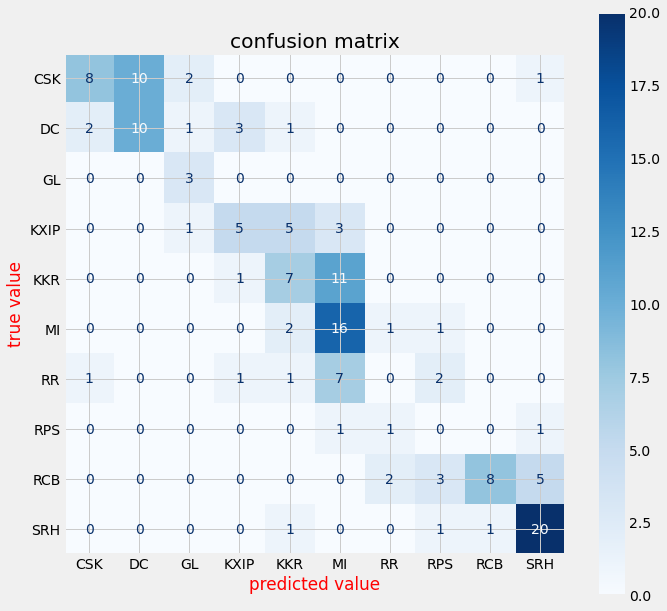

In [164]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
matrix = plot_confusion_matrix(grid,X_test_std,y_test,display_labels=Teams,
                                 cmap=plt.cm.Blues)
matrix.ax_.set_title('confusion matrix', color='black')
plt.xlabel('predicted value', color='red')
plt.ylabel('true value', color='red')
plt.gcf().set_size_inches(10,10)
plt.show()

In [165]:
#print the first 25 true and predicted response
print ('true:', y_test.values[0:24])
print ('pred:', y_predKNN[0:24])

true: [ 6  5  1  5  8 10  9  3 10  2  9 10  6  1  3  9  5 10  6  9  8  9  2  1]
pred: [ 6  6  1  6  7 10  9  3  9  2 10 10  6  1  5  9  5 10  6  8 10 10  2  1]


In [166]:
KNN_h_f1=f1_score(y_test,y_predKNN,average='weighted')
KNN_h_ac=accuracy_score(y_test, y_predKNN)

In [167]:
MissedKNN=(y_test != y_predKNN).sum()
print('Missed samples(knn): %d' % (y_test != y_predKNN).sum())
MAE_KNN=mean_absolute_error(y_test, y_predKNN)
print("Mean absolute error of KNN: ",MAE_KNN)
print("KNN's Accuracy: ",accuracy_score(y_test, y_predKNN))
print("KNN's F1 score: ", f1_score(y_test,y_predKNN,average='weighted'))

Missed samples(knn): 73
Mean absolute error of KNN:  0.8133333333333334
KNN's Accuracy:  0.5133333333333333
KNN's F1 score:  0.4987504055779918


##  Decision Tree

In [168]:
#now train the model
Decision_tree_model = DecisionTreeClassifier()
Decision_tree_model.fit(X_train_std,y_train)

DecisionTreeClassifier()

In [169]:
predTree = Decision_tree_model.predict(X_test_std)#make prediction

In [170]:
predTree

array([ 6,  5,  1,  3,  8, 10,  9,  3, 10,  2,  3, 10,  6,  1,  3,  9,  5,
       10,  6,  9,  1,  9,  2,  1,  8,  2,  5,  9,  9, 10, 10, 10,  6,  3,
        5, 10,  0,  7, 10,  9,  1, 10,  8,  3,  5,  6,  5,  3,  0,  3,  9,
        0,  7,  3, 10,  0, 10,  0,  6, 10,  5,  0,  9,  0,  5,  6,  0, 10,
        6,  3, 10,  8,  6, 10,  5,  5,  9,  0,  7,  9,  5,  6,  9,  0,  8,
        5,  0,  0,  0,  6, 10,  0,  0,  5,  1,  3,  0,  5,  6, 10,  3,  2,
       10,  0,  3,  7,  6, 10,  5,  0,  6,  1,  5,  3,  0,  6,  0,  1,  7,
        9,  0,  1,  6,  3,  6,  6, 10,  7,  1, 10,  9,  1,  0,  9,  7,  6,
        7,  1,  5, 10,  0, 10,  5,  1,  9,  3,  6,  6,  0,  0])

In [171]:
#print (le.inverse_transform(predTree)[:100])

In [172]:
DTf1=f1_score(y_test, predTree,average='weighted')
DTac=accuracy_score(y_test, predTree)

In [173]:
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, predTree))
print("DecisionTrees's F1 score: ", f1_score(y_test, predTree,average='weighted'))

DecisionTrees's Accuracy:  0.88
DecisionTrees's F1 score:  0.8806166082448896


### Hyperparameter tunning using GridSearchCV

In [174]:
param_dist={"criterion":['gini',"grid","entropy"],
            "max_depth":[None,1,2,3,4,5,6,7,8,10,15,20,25,30,35]}

In [175]:

grid1=GridSearchCV(estimator = Decision_tree_model, 
                 param_grid = param_dist, cv=10, n_jobs=-1)

In [176]:
grid1.fit(X_train_std, y_train)#now train the model

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'grid', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20,
                                       25, 30, 35]})

In [177]:
grid1.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=25)

In [178]:
grid1.best_score_

0.9766666666666668

In [179]:
grid1.best_params_

{'criterion': 'entropy', 'max_depth': 25}

In [180]:
predTree=grid1.predict(X_test_std)#make prediction
print(classification_report(y_test,predTree))
print("confusion matrix")
print(confusion_matrix(y_test,predTree))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.94      0.94      0.94        17
           2       0.75      1.00      0.86         3
           3       0.88      1.00      0.93        14
           5       1.00      1.00      1.00        19
           6       1.00      0.85      0.92        20
           7       1.00      1.00      1.00        12
           8       1.00      0.67      0.80         3
           9       1.00      0.89      0.94        18
          10       0.96      1.00      0.98        23

    accuracy                           0.95       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.96      0.95      0.95       150

confusion matrix
[[21  0  0  0  0  0  0  0  0  0]
 [ 0 16  1  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0]
 [ 1  0  0  1  0 17  0  0  0  1]
 [ 0  0  0  0  0  0 12  0 

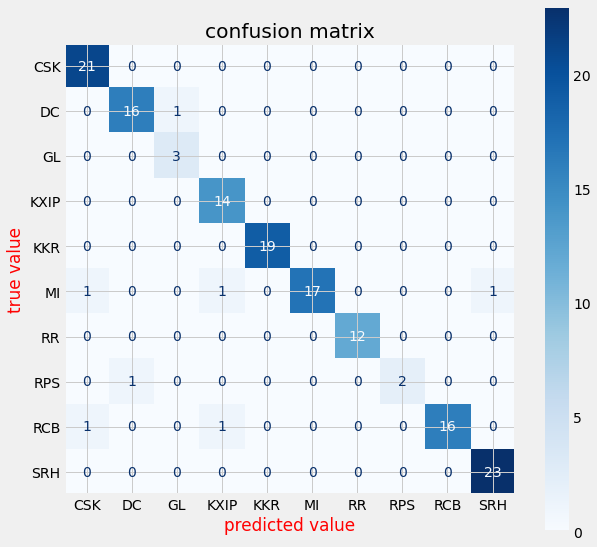

In [181]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
matrix = plot_confusion_matrix(grid1,X_test_std,y_test,display_labels=Teams,
                                 cmap=plt.cm.Blues)
matrix.ax_.set_title('confusion matrix', color='black')
plt.xlabel('predicted value', color='red')
plt.ylabel('true value', color='red')
plt.gcf().set_size_inches(9,9)
plt.show()

In [182]:
#print the first 25 true and predicted response
print ('true:', y_test.values[0:24])
print ('pred:', predTree[0:24])

true: [ 6  5  1  5  8 10  9  3 10  2  9 10  6  1  3  9  5 10  6  9  8  9  2  1]
pred: [ 6  5  1  5  8 10  9  3 10  2  3 10  6  1  3  9  5 10  6  9  1  9  2  1]


In [183]:
DT_h_f1=f1_score(y_test, predTree,average='weighted')
DT_h_ac=accuracy_score(y_test, predTree)

In [184]:
MissedDT=(y_test != predTree).sum()
print('Missed samples(DT): %d' % (y_test != predTree).sum())
MAE_DT=mean_absolute_error(y_test, predTree)
print("Mean absolute error of DecisionTrees: ",MAE_DT)
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, predTree))
print("DecisionTrees's F1 score: ", f1_score(y_test, predTree,average='weighted'))

Missed samples(DT): 7
Mean absolute error of DecisionTrees:  0.24
DecisionTrees's Accuracy:  0.9533333333333334
DecisionTrees's F1 score:  0.9527582862025916


## Support Vector Machine

In [185]:
#now train the model
svmmodel=SVC()
svmmodel.fit(X_train_std,y_train)

SVC()

In [186]:
y_pred=svmmodel.predict(X_test_std)#make prediction
y_pred

array([ 5,  6,  1,  6,  7, 10,  9,  0,  9,  1, 10, 10,  6,  2,  5,  9,  9,
       10,  6, 10, 10,  9,  3,  0,  6,  1,  5, 10,  9, 10, 10, 10,  2,  5,
        5, 10,  1,  5, 10,  3,  2, 10, 10,  3,  6,  5,  5,  5,  1,  9, 10,
        3,  6,  3,  6,  1, 10,  1,  5, 10,  6,  1, 10,  9,  5,  5,  1, 10,
        6,  3, 10,  6,  9, 10,  5,  6, 10,  2,  6, 10,  6,  6,  9,  0,  6,
        6,  3,  1,  2,  6,  6,  1,  2,  2,  1,  6,  1,  6,  6, 10,  3,  3,
        9,  3,  1,  6,  6, 10,  6,  0,  9,  1,  6,  2,  2,  6,  1,  1,  6,
       10,  2,  3,  6,  6, 10,  6,  6,  6,  1, 10,  9,  1,  1, 10,  5,  6,
        6,  1,  6, 10,  0,  9,  5,  3, 10,  1,  5,  5,  1,  6])

In [187]:
SVMf1=f1_score(y_test, y_pred,average='weighted')
SVMac=accuracy_score(y_test, y_pred)

In [188]:
print("SVM's Accuracy: ", accuracy_score(y_test,y_pred))
print("SVM's F1 score: ",f1_score(y_test, y_pred,average='weighted'))

SVM's Accuracy:  0.36666666666666664
SVM's F1 score:  0.33513815164692357


### Hyperparameter tunning using GridSearchCV

In [189]:
parameters = {'C': [1, 5, 10,15,20, 100],
               'kernel': ['linear','rbf'],
               'gamma': [0.1,0.5,1, 1.5, 2, 2.5],
             'random_state':[1,2,5,6,10]}
grid2= GridSearchCV(estimator = svmmodel,
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = -1)
grid2.fit(X_train_std, y_train)#now train the model


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 15, 20, 100],
                         'gamma': [0.1, 0.5, 1, 1.5, 2, 2.5],
                         'kernel': ['linear', 'rbf'],
                         'random_state': [1, 2, 5, 6, 10]})

In [190]:
grid2.best_score_

0.72

In [191]:
grid2.best_estimator_

SVC(C=100, gamma=0.1, random_state=1)

In [192]:
grid2.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 1}

In [193]:
predSVM=grid2.predict(X_test_std)#make prediction
print(classification_report(y_test,predSVM))
print("confusion matrix")
print(confusion_matrix(y_test,predSVM))

              precision    recall  f1-score   support

           0       0.86      0.29      0.43        21
           1       0.47      0.47      0.47        17
           2       0.04      0.33      0.08         3
           3       0.67      0.43      0.52        14
           5       0.75      0.63      0.69        19
           6       0.65      0.75      0.70        20
           7       0.00      0.00      0.00        12
           8       0.05      0.33      0.08         3
           9       0.69      0.61      0.65        18
          10       0.82      0.61      0.70        23

    accuracy                           0.49       150
   macro avg       0.50      0.45      0.43       150
weighted avg       0.63      0.49      0.53       150

confusion matrix
[[ 6  6  9  0  0  0  0  0  0  0]
 [ 1  8  6  1  1  0  0  0  0  0]
 [ 0  2  1  0  0  0  0  0  0  0]
 [ 0  1  6  6  1  0  0  0  0  0]
 [ 0  0  0  2 12  3  0  1  1  0]
 [ 0  0  1  0  0 15  1  3  0  0]
 [ 0  0  0  0  2  5  0  5 

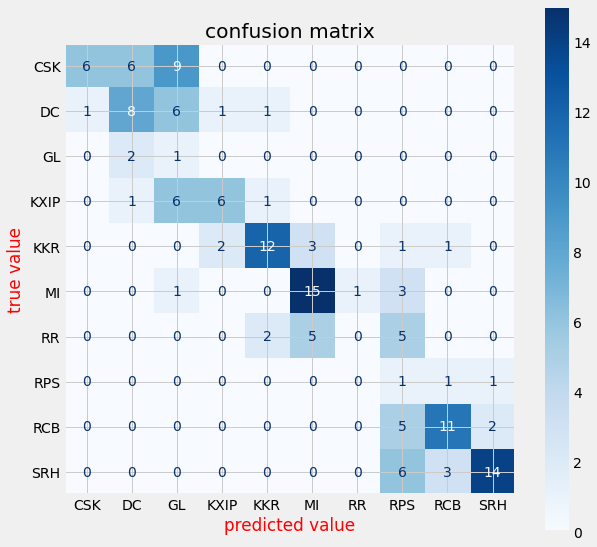

In [194]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
matrix = plot_confusion_matrix(grid2,X_test_std,y_test,display_labels=Teams,
                                 cmap=plt.cm.Blues)
matrix.ax_.set_title('confusion matrix', color='black')
plt.xlabel('predicted value', color='red')
plt.ylabel('true value', color='red')
plt.gcf().set_size_inches(9,9)
plt.show()

In [195]:
#print the first 25 true and predicted response
print ('true:', y_test.values[0:24])
print ('pred:', predSVM[0:24])

true: [ 6  5  1  5  8 10  9  3 10  2  9 10  6  1  3  9  5 10  6  9  8  9  2  1]
pred: [ 6  5  1  5  9 10  9  2  9  2  9  9  6  1  2  9  9 10  7  9 10  9  1  2]


In [196]:
SVM_h_f1=f1_score(y_test, predSVM,average='weighted')
SVM_h_ac=accuracy_score(y_test, predSVM)

In [197]:
MissedSVM=(y_test != predSVM).sum()
print('Missed samples(DT): %d' % (y_test != predSVM).sum())
MAE_SVM=mean_absolute_error(y_test,predSVM)
print("Mean absolute error of SVM: ",MAE_SVM)
print("SVM's Accuracy: ", accuracy_score(y_test,predSVM))
print("SVM's F1 score: ", f1_score(y_test,predSVM,average='weighted'))

Missed samples(DT): 76
Mean absolute error of SVM:  0.7533333333333333
SVM's Accuracy:  0.49333333333333335
SVM's F1 score:  0.5300949045403337


# Logistic Regression

In [198]:
#now train the model
LR = LogisticRegression()
LR.fit(X_train_std,y_train)
LR

LogisticRegression()

In [199]:
yhat = LR.predict(X_test_std)#make prediction

In [200]:
LRac=accuracy_score(y_test,yhat)
LRf1=f1_score(y_test,yhat,average='weighted')

In [201]:
print("LR Accuracy: ", accuracy_score(y_test,yhat))
print("LR F1 score: ", f1_score(y_test,yhat,average='weighted'))

LR Accuracy:  0.16
LR F1 score:  0.16730413879428657


### Hyperparameter tunning using GridSearchCV

In [202]:
param_grid={"penalty": ["l1", "l2", "elasticnet", "none"],
          "C" : np.logspace(-4,4,20),
          "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
          "max_iter" : [100, 200, 300, 400]}

In [203]:
gridl = GridSearchCV(estimator = LR ,
                           param_grid = param_grid,
                           cv = 10,
                           n_jobs = -1)

In [204]:
gridl = gridl.fit(X_train_std,y_train)#now train the model

In [205]:
gridl.best_estimator_

LogisticRegression(C=0.08858667904100823, penalty='l1', solver='liblinear')

In [206]:
gridl.best_score_

0.27999999999999997

In [207]:
gridl.best_params_

{'C': 0.08858667904100823,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [208]:
predLR=gridl.predict(X_test_std)#make prediction
print(classification_report(y_test,predLR))
print("confusion matrix")
print(confusion_matrix(y_test,predLR))

              precision    recall  f1-score   support

           0       0.32      0.52      0.40        21
           1       0.25      0.06      0.10        17
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        19
           6       0.19      0.60      0.29        20
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00         3
           9       0.28      0.39      0.33        18
          10       0.57      0.35      0.43        23

    accuracy                           0.26       150
   macro avg       0.16      0.19      0.15       150
weighted avg       0.22      0.26      0.21       150

confusion matrix
[[11  1  0  3  0  5  0  0  0  1]
 [ 8  1  0  2  0  4  0  0  2  0]
 [ 0  0  0  0  0  3  0  0  0  0]
 [ 6  0  0  0  0  8  0  0  0  0]
 [ 3  0  0  0  0 11  0  0  3  2]
 [ 4  1  0  0  0 12  0  0  2  1]
 [ 1  1  0  0  0  6  0  0 

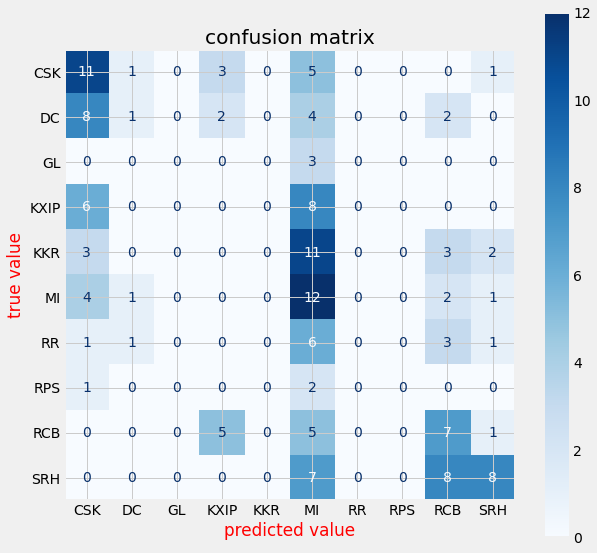

In [209]:

matrix = plot_confusion_matrix(gridl,X_test_std,y_test,display_labels=Teams,
                                 cmap=plt.cm.Blues)
matrix.ax_.set_title('confusion matrix', color='black')
plt.xlabel('predicted value', color='red')
plt.ylabel('true value', color='red')
plt.gcf().set_size_inches(9,9)
plt.show()

In [210]:
#print the first 25 true and predicted response
print ('true:', y_test.values[0:24])
print ('pred:', predSVM[0:24])

true: [ 6  5  1  5  8 10  9  3 10  2  9 10  6  1  3  9  5 10  6  9  8  9  2  1]
pred: [ 6  5  1  5  9 10  9  2  9  2  9  9  6  1  2  9  9 10  7  9 10  9  1  2]


In [211]:
LR_h_ac=accuracy_score(y_test,predLR)
LR_h_f1=f1_score(y_test,predLR,average='weighted')

In [212]:
MissedLR=(y_test != predLR).sum()
print('Missed samples(LR): %d' % (y_test != predLR).sum())
MAE_LR=mean_absolute_error(y_test,predLR)
print("Mean absolute error of LR: ",MAE_LR)
print("LR's Accuracy: ", accuracy_score(y_test,predLR))
print("LR's F1 score: ", f1_score(y_test,predLR,average='weighted'))

Missed samples(LR): 111
Mean absolute error of LR:  2.4066666666666667
LR's Accuracy:  0.26
LR's F1 score:  0.2107239414092874


## Random forest

In [213]:
RF = RandomForestClassifier()

In [214]:
RF.fit(X_train_std,y_train)#now train the model
RF

RandomForestClassifier()

In [215]:
yhatRF = RF.predict(X_test_std)#make prediction
yhatRF

array([ 6,  5,  1,  5,  7, 10,  9,  3, 10,  2,  3, 10,  6,  1,  3,  9,  5,
       10,  6,  9,  1,  9,  2,  1,  8,  2,  5,  9,  9, 10, 10, 10,  0,  5,
        5, 10,  0,  7, 10,  9,  1, 10,  3,  0,  5,  6,  5,  5,  0,  3,  9,
        0,  7,  2, 10,  0, 10,  1,  6, 10,  5,  0,  9,  7,  5,  6,  0, 10,
        6,  3, 10,  7,  6, 10,  6,  5,  9,  0,  6,  9,  5,  6,  9,  3,  7,
        5,  1,  0,  0,  6, 10,  0,  0,  5,  3,  3,  0,  5,  6, 10,  5,  1,
       10,  0,  3,  7,  6, 10,  5,  0,  6,  1,  5,  3,  0,  6,  0,  1,  6,
        9,  0,  3,  6,  3, 10,  6,  5,  7,  1, 10,  0,  1,  0,  9,  7,  6,
        7,  1,  5, 10,  0,  6,  5,  1,  9,  5,  6,  6,  0,  6])

In [216]:
RFac= accuracy_score(y_test,yhatRF)
RFf1=f1_score(y_test,yhatRF,average='weighted')

In [217]:
print("RF Accuracy: ", accuracy_score(y_test,yhatRF))
print("RF F1 score: ", f1_score(y_test,yhatRF,average='weighted'))

RF Accuracy:  0.8666666666666667
RF F1 score:  0.8615312365849999


### Selecting best hyperparameter using GridSearchCV

In [218]:
param_grid={"max_depth": [10,20,30,40,50,60,80],
          "n_estimators" : [100, 200, 300, 400,500,600,800,1000]
           }

In [219]:
gridRF = GridSearchCV(estimator = RF ,
                           param_grid = param_grid,
                           cv = 10,
                           n_jobs = -1)

In [220]:
gridRF = gridRF.fit(X_train_std,y_train)#now train the model

In [221]:
gridRF.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=300)

In [222]:
gridRF.best_score_

0.8816666666666666

In [223]:
gridRF.best_params_

{'max_depth': 20, 'n_estimators': 300}

In [224]:
predRF=gridRF.predict(X_test_std)#make prediction
print(classification_report(y_test,predRF))
print("confusion matrix")
print(confusion_matrix(y_test,predRF))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.88      0.88      0.88        17
           2       0.75      1.00      0.86         3
           3       0.67      0.57      0.62        14
           5       0.79      0.79      0.79        19
           6       0.66      0.95      0.78        20
           7       0.86      0.50      0.63        12
           8       0.33      0.33      0.33         3
           9       1.00      0.78      0.88        18
          10       1.00      0.96      0.98        23

    accuracy                           0.83       150
   macro avg       0.78      0.78      0.77       150
weighted avg       0.84      0.83      0.82       150

confusion matrix
[[21  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  2  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0]
 [ 1  0  1  8  3  1  0  0  0  0]
 [ 0  0  0  0 15  4  0  0  0  0]
 [ 0  0  0  0  0 19  0  1  0  0]
 [ 0  1  0  1  0  4  6  0 

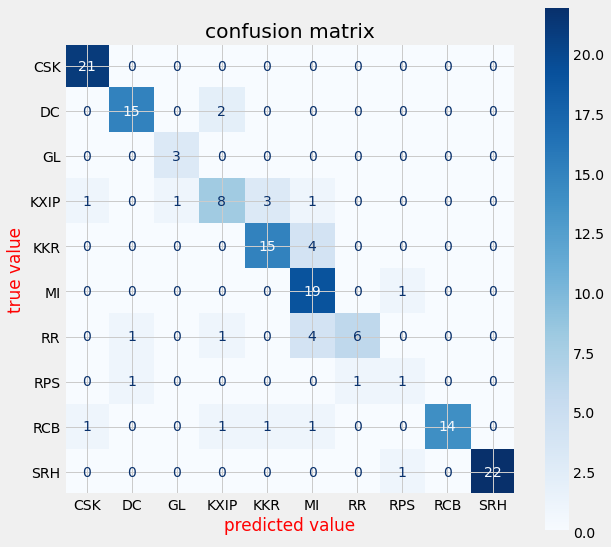

In [225]:

matrix = plot_confusion_matrix(gridRF,X_test_std,y_test,display_labels=Teams,
                                 cmap=plt.cm.Blues)
matrix.ax_.set_title('confusion matrix', color='black')
plt.xlabel('predicted value', color='red')
plt.ylabel('true value', color='red')
plt.gcf().set_size_inches(9,9)
plt.show()

In [226]:
#print the first 25 true and predicted response
print ('true:', y_test.values[0:24])
print ('pred:', predRF[0:24])

true: [ 6  5  1  5  8 10  9  3 10  2  9 10  6  1  3  9  5 10  6  9  8  9  2  1]
pred: [ 6  5  1  5  7 10  9  3 10  2  3 10  6  1  3  9  5 10  6  9  1  9  2  1]


In [227]:
RF_h_ac= accuracy_score(y_test,predRF)
RF_h_f1=f1_score(y_test,predRF,average='weighted')

In [228]:
MissedRF=(y_test != predRF).sum()
print('Missed samples(RF): %d' % (y_test != predRF).sum())
MAE_RF=mean_absolute_error(y_test,predRF)
print("Mean absolute error of RF: ",MAE_RF)
print("RF Accuracy: ", accuracy_score(y_test,predRF))
print("RF F1 score: ", f1_score(y_test,predRF,average='weighted'))

Missed samples(RF): 26
Mean absolute error of RF:  0.46
RF Accuracy:  0.8266666666666667
RF F1 score:  0.8237353871414022


##  Perceptron

In [229]:
#now train the model through perceptron
ppn = Perceptron()
ppn.fit(X_train_std,y_train)

Perceptron()

In [230]:
#make prediction
y_predppn = ppn.predict(X_test_std)
y_predppn

array([ 6,  9,  6,  7, 10, 10, 10,  5,  9,  6,  9, 10,  9,  2,  6,  9, 10,
       10,  6,  6, 10,  9,  5,  6,  7,  6,  6,  6, 10,  9, 10,  9,  2,  6,
        6,  6,  5,  9, 10,  6,  2, 10,  9,  7,  6,  6,  6,  7,  6,  5, 10,
       10, 10,  5,  6,  9,  9,  0,  6, 10,  9,  0,  9, 10,  6,  2,  6,  7,
        6,  6, 10,  6,  9,  7,  7,  6, 10,  2,  6,  6,  6,  6,  9,  0,  6,
       10,  7,  6,  2, 10,  6,  6,  2,  2,  6,  7,  0,  6,  9, 10,  6,  7,
        9,  7,  6,  6,  6, 10,  9,  0,  9,  9,  2,  6,  2,  6,  6,  6,  6,
        2,  2,  6,  6,  6,  7,  9,  6,  6,  0, 10,  9,  6,  6,  9,  6,  9,
       10,  7,  9,  9,  0,  7,  6,  2,  9,  7,  2,  7,  2,  6])

In [231]:
ppnac= accuracy_score(y_test,y_predppn)
ppnf1=f1_score(y_test,y_predppn,average='weighted')

In [232]:
print("Perceptron Accuracy: ", accuracy_score(y_test,y_predppn))
print("Perceptron F1 score: ", f1_score(y_test,y_predppn,average='weighted'))

Perceptron Accuracy:  0.22666666666666666
Perceptron F1 score:  0.19478202135001393


## Hyperparameter tunning using GridSearchCV

In [233]:
param_grid={'penalty':['l2','l1','elasticnet'],
            'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3],
            'max_iter': [5, 10, 15, 20, 50,100,150,200,300,400],
            'eta0':[80,90,100,400]
           }

In [234]:
gridPpn = GridSearchCV(estimator = ppn ,
                           param_grid = param_grid,
                           cv = 10,
                           n_jobs = -1)

In [235]:
ppn.get_params().keys()

dict_keys(['alpha', 'class_weight', 'early_stopping', 'eta0', 'fit_intercept', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [236]:
gridPpn = gridPpn.fit(X_train_std,y_train)#now train the model

In [237]:
gridPpn.best_estimator_

Perceptron(eta0=400, max_iter=10, penalty='l2')

In [238]:
gridPpn.best_score_

0.20833333333333334

In [239]:
gridPpn.best_params_

{'alpha': 0.0001, 'eta0': 400, 'max_iter': 10, 'penalty': 'l2'}

In [240]:
predPpn=gridPpn.predict(X_test_std)#make prediction
print(classification_report(y_test,predPpn))
print("confusion matrix")
print(confusion_matrix(y_test,predPpn))

              precision    recall  f1-score   support

           0       0.50      0.10      0.16        21
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00        19
           6       0.17      0.75      0.28        20
           7       0.14      0.25      0.18        12
           8       0.05      0.33      0.09         3
           9       0.00      0.00      0.00        18
          10       0.00      0.00      0.00        23

    accuracy                           0.14       150
   macro avg       0.08      0.13      0.06       150
weighted avg       0.11      0.14      0.08       150

confusion matrix
[[ 2  1  0  1  1  0 13  2  1  0  0]
 [ 1  0  0  0  1  0  7  2  6  0  0]
 [ 0  0  0  0  0  0  2  1  0  0  0]
 [ 1  2  0  0  1  0  8  0  2  0  0]
 [ 0  0  0  0  0  0  0  0 

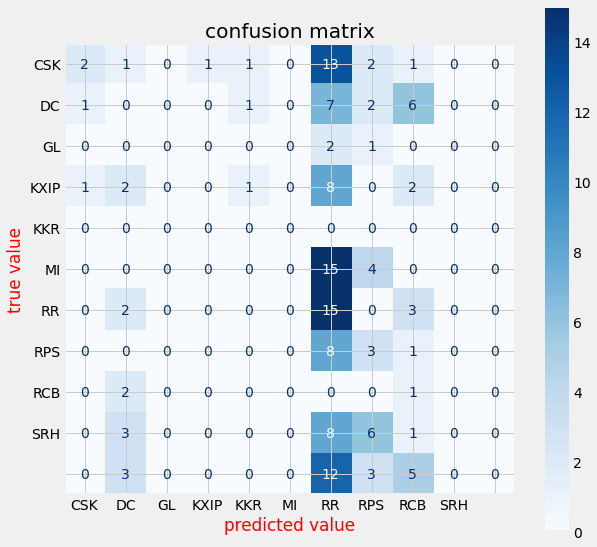

In [241]:
matrix = plot_confusion_matrix(gridPpn,X_test_std,y_test,display_labels=Teams,
                                 cmap=plt.cm.Blues)
matrix.ax_.set_title('confusion matrix', color='black')
plt.xlabel('predicted value', color='red')
plt.ylabel('true value', color='red')
plt.gcf().set_size_inches(9,9)
plt.show()

In [242]:
#print the first 25 true and predicted response
print ('true:', y_test.values[0:24])
print ('pred:', predRF[0:24])

true: [ 6  5  1  5  8 10  9  3 10  2  9 10  6  1  3  9  5 10  6  9  8  9  2  1]
pred: [ 6  5  1  5  7 10  9  3 10  2  3 10  6  1  3  9  5 10  6  9  1  9  2  1]


In [243]:
Ppn_h_ac= accuracy_score(y_test,predPpn)
Ppn_h_f1=f1_score(y_test,predPpn,average='weighted')

In [244]:
MissedPpn=(y_test != predPpn).sum()
print('Missed samples(perceptron): %d' % (y_test != predPpn).sum())
MAE_PPN=mean_absolute_error(y_test,predPpn)
print("Mean absolute error ofperceptron: ",MAE_PPN)
print("perceptron Accuracy: ", accuracy_score(y_test,predPpn))
print("perceptron F1 score: ", f1_score(y_test,predPpn,average='weighted'))

Missed samples(perceptron): 129
Mean absolute error ofperceptron:  3.1533333333333333
perceptron Accuracy:  0.14
perceptron F1 score:  0.07572162201727418


# Print Report

In [245]:
algorithm_list = ['KNN', 'Decision Tree', 'SVM', 'LoisticRegression', 'Random forest','Perceptron']
F1_score_listTrain = [KNNf1, DTf1,SVMf1,LRf1,RFf1,ppnf1]
F1_score_list = [KNN_h_f1, DT_h_f1, SVM_h_f1, LR_h_f1,RF_h_f1,Ppn_h_f1]
missed_sample_list=[MissedKNN,MissedDT,MissedSVM,MissedLR,MissedRF,MissedPpn]
MAE_list =[MAE_KNN,MAE_DT,MAE_SVM,MAE_LR,MAE_RF,MAE_PPN]
df = pd.DataFrame(list(zip(algorithm_list,F1_score_listTrain,F1_score_list,missed_sample_list,MAE_list)),
                  columns=['Algorithm','F1-score(Normal)','F1-score(Hypertuned)','Missed Sample(Hypertuned)','MAE(Hypertuned)'])
df.set_index('Algorithm', inplace = True)
df

F1-score(Normal)  F1-score(Hypertuned)  \
Algorithm                                                   
KNN                        0.268318              0.498750   
Decision Tree              0.880617              0.952758   
SVM                        0.335138              0.530095   
LoisticRegression          0.167304              0.210724   
Random forest              0.861531              0.823735   
Perceptron                 0.194782              0.075722   

                   Missed Sample(Hypertuned)  MAE(Hypertuned)  
Algorithm                                                      
KNN                                       73         0.813333  
Decision Tree                              7         0.240000  
SVM                                       76         0.753333  
LoisticRegression                        111         2.406667  
Random forest                             26         0.460000  
Perceptron                               129         3.153333